In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pandas, scikitlearn, matplotlib
%pip install pandas scikit-learn matplotlib seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
# widgets for interactive plots
# %pip install ipympl
# %matplotlib widget

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# read weather.csv

df = pd.read_csv('weather.csv')
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

### Analiza danych

In [6]:
# # plot time series of features

# fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# ax.plot(df['Date'], df['MinTemp'], label='Temperature')
# ax.plot(df['Date'], df['Humidity9am'], label='Humidity')
# ax.plot(df['Date'], df['Pressure9am'], label='Pressure')
# ax.set_xlabel('Date')
# ax.set_ylabel('Value')
# ax.set_title('Time Series')
# ax.legend()
# plt.show()



In [7]:
# drop unnecessary columns RISK_MM, Date, Location, RainToday
df = df.drop(['RISK_MM', 'Date', 'Location', 'RainToday'], axis=1)
df.describe()

MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.000000    13.000000   
25%        31.000000      6.000000     11.000000    64.000000    32.250000   
50%        39.000000      7.000000     17.000000    72.000000    43.000000   
75%        46.000000     13.000000     24.000000    81.000000    55.000000   
max        98.000000     41.000000     52.000000    99.000000    96.000000   

       Pressure9am  Pressure3pm    Cloud9am    Cloud3pm     Temp9am  \
count   366.000000   366.000000  366.000000  366.000000  366.000000   
mean   1019.709016  1016.810383    3.890710    4.024590   12.358470   
std       6.686212     6.469422    2.956131    2.666268    5.630832   
min     996.500000   996.800000    0.000000    0.000000    0.100000   
25%    1015.350000  1012.800000    1.000000    1.000000    7.625000   
50%    1020.150000  1017.400000    3.500000    4.000000   12.550000   
75%    1024.475000  1021.475000    7.000000    7.000000   17.000000   
max    1035.700000  1033.200000    8.000000    8.000000   24.700000   

          Temp3pm  
count  366.000000  
mean    19.230874  
std      6.640346  
min      5.100000  
25%     14.150000  
50%     18.550000  
75%     24.000000  
max     34.500000

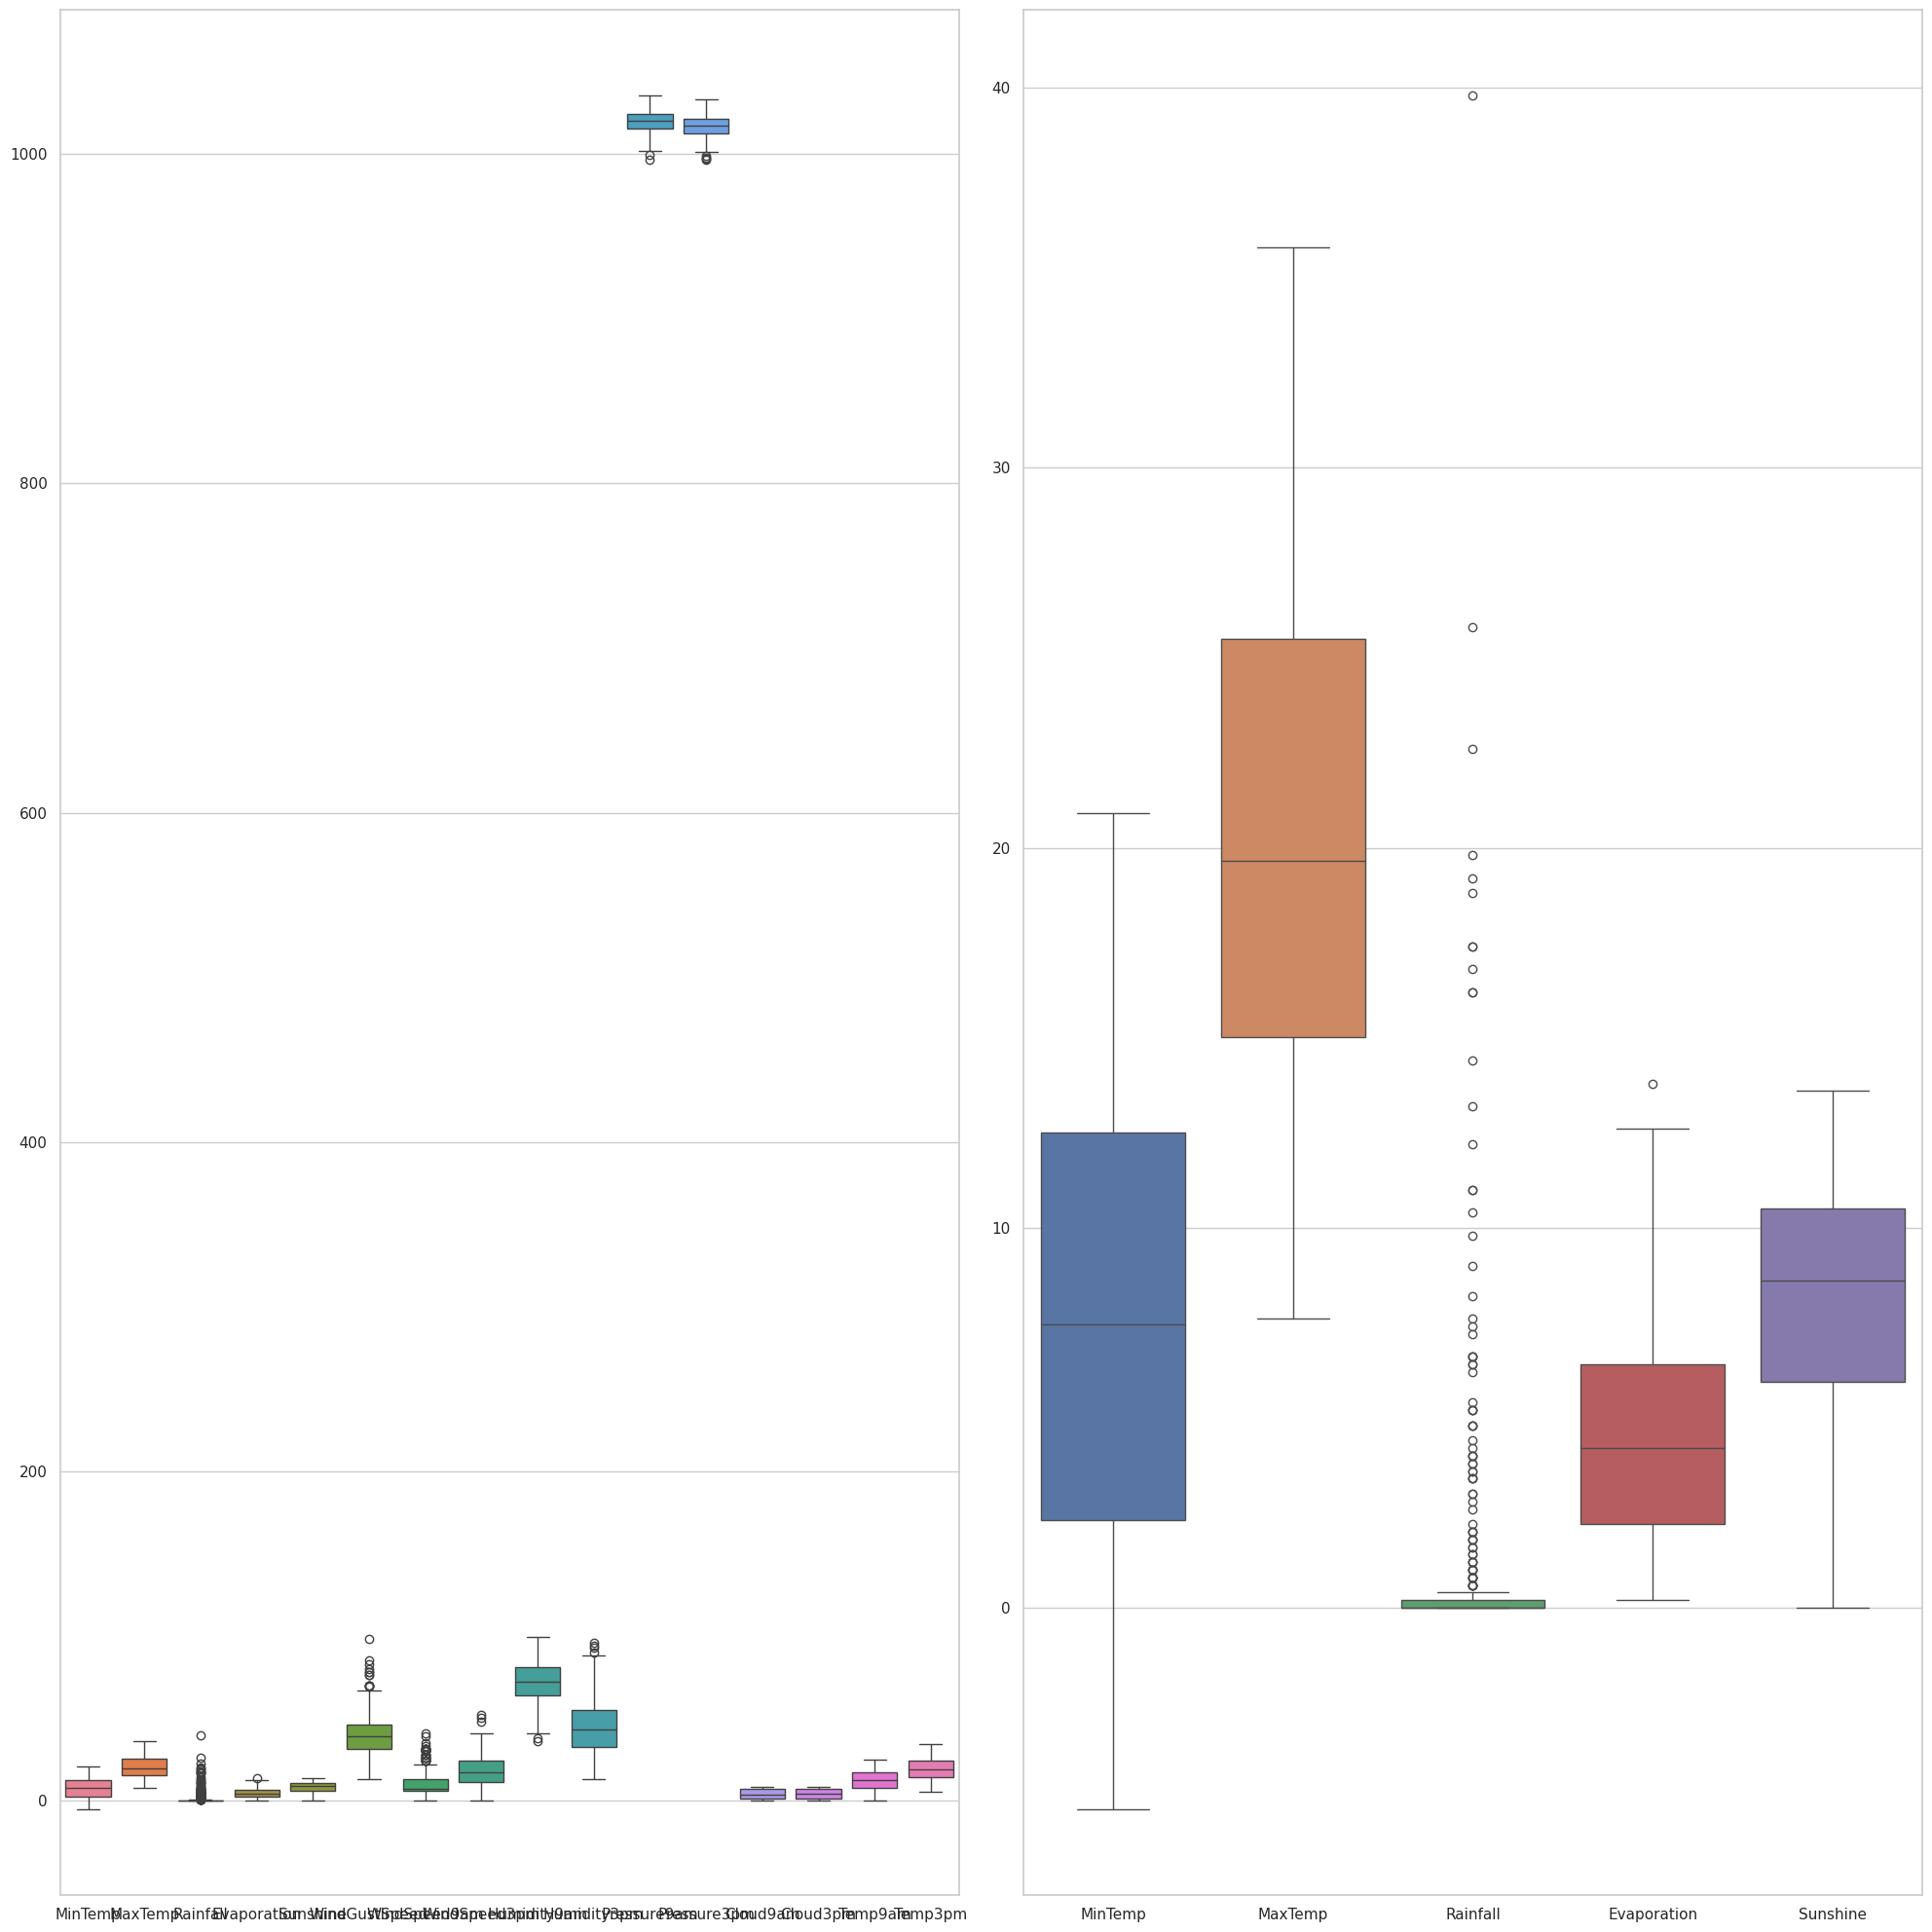

In [8]:
# show outliers in each column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
sns.boxplot(data=df, ax=ax[0])
sns.boxplot(data=df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']], ax=ax[1])
plt.tight_layout()
plt.show()


In [9]:
# show nan values in each column
df.isna().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainTomorrow      0
dtype: int64

In [10]:
# populate nan numerical values with mean
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        df[column] = df[column].fillna(df[column].mean())

# populate nan categorical values with mode
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])

# Show nan values
df.isna().sum()


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainTomorrow     0
dtype: int64

In [11]:
# prepare data for visualization (get only numerical values)

df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0      8.0     24.3       0.0          3.4       6.3           30.0   
1     14.0     26.9       3.6          4.4       9.7           39.0   
2     13.7     23.4       3.6          5.8       3.3           85.0   
3     13.3     15.5      39.8          7.2       9.1           54.0   
4      7.6     16.1       2.8          5.6      10.6           50.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           6.0            20           68           29       1019.7   
1           4.0            17           80           36       1012.4   
2           6.0             6           82           69       1009.5   
3          30.0            24           62           56       1005.5   
4          20.0            28           68           49       1018.3   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0       1015.0         7         7     14.4     23.6  
1       1008.4         5         3     17.5     25.7  
2       1007.2         8         7     15.4     20.2  
3       1007.0         2         7     13.5     14.1  
4       1018.5         7         7     11.1     15.4

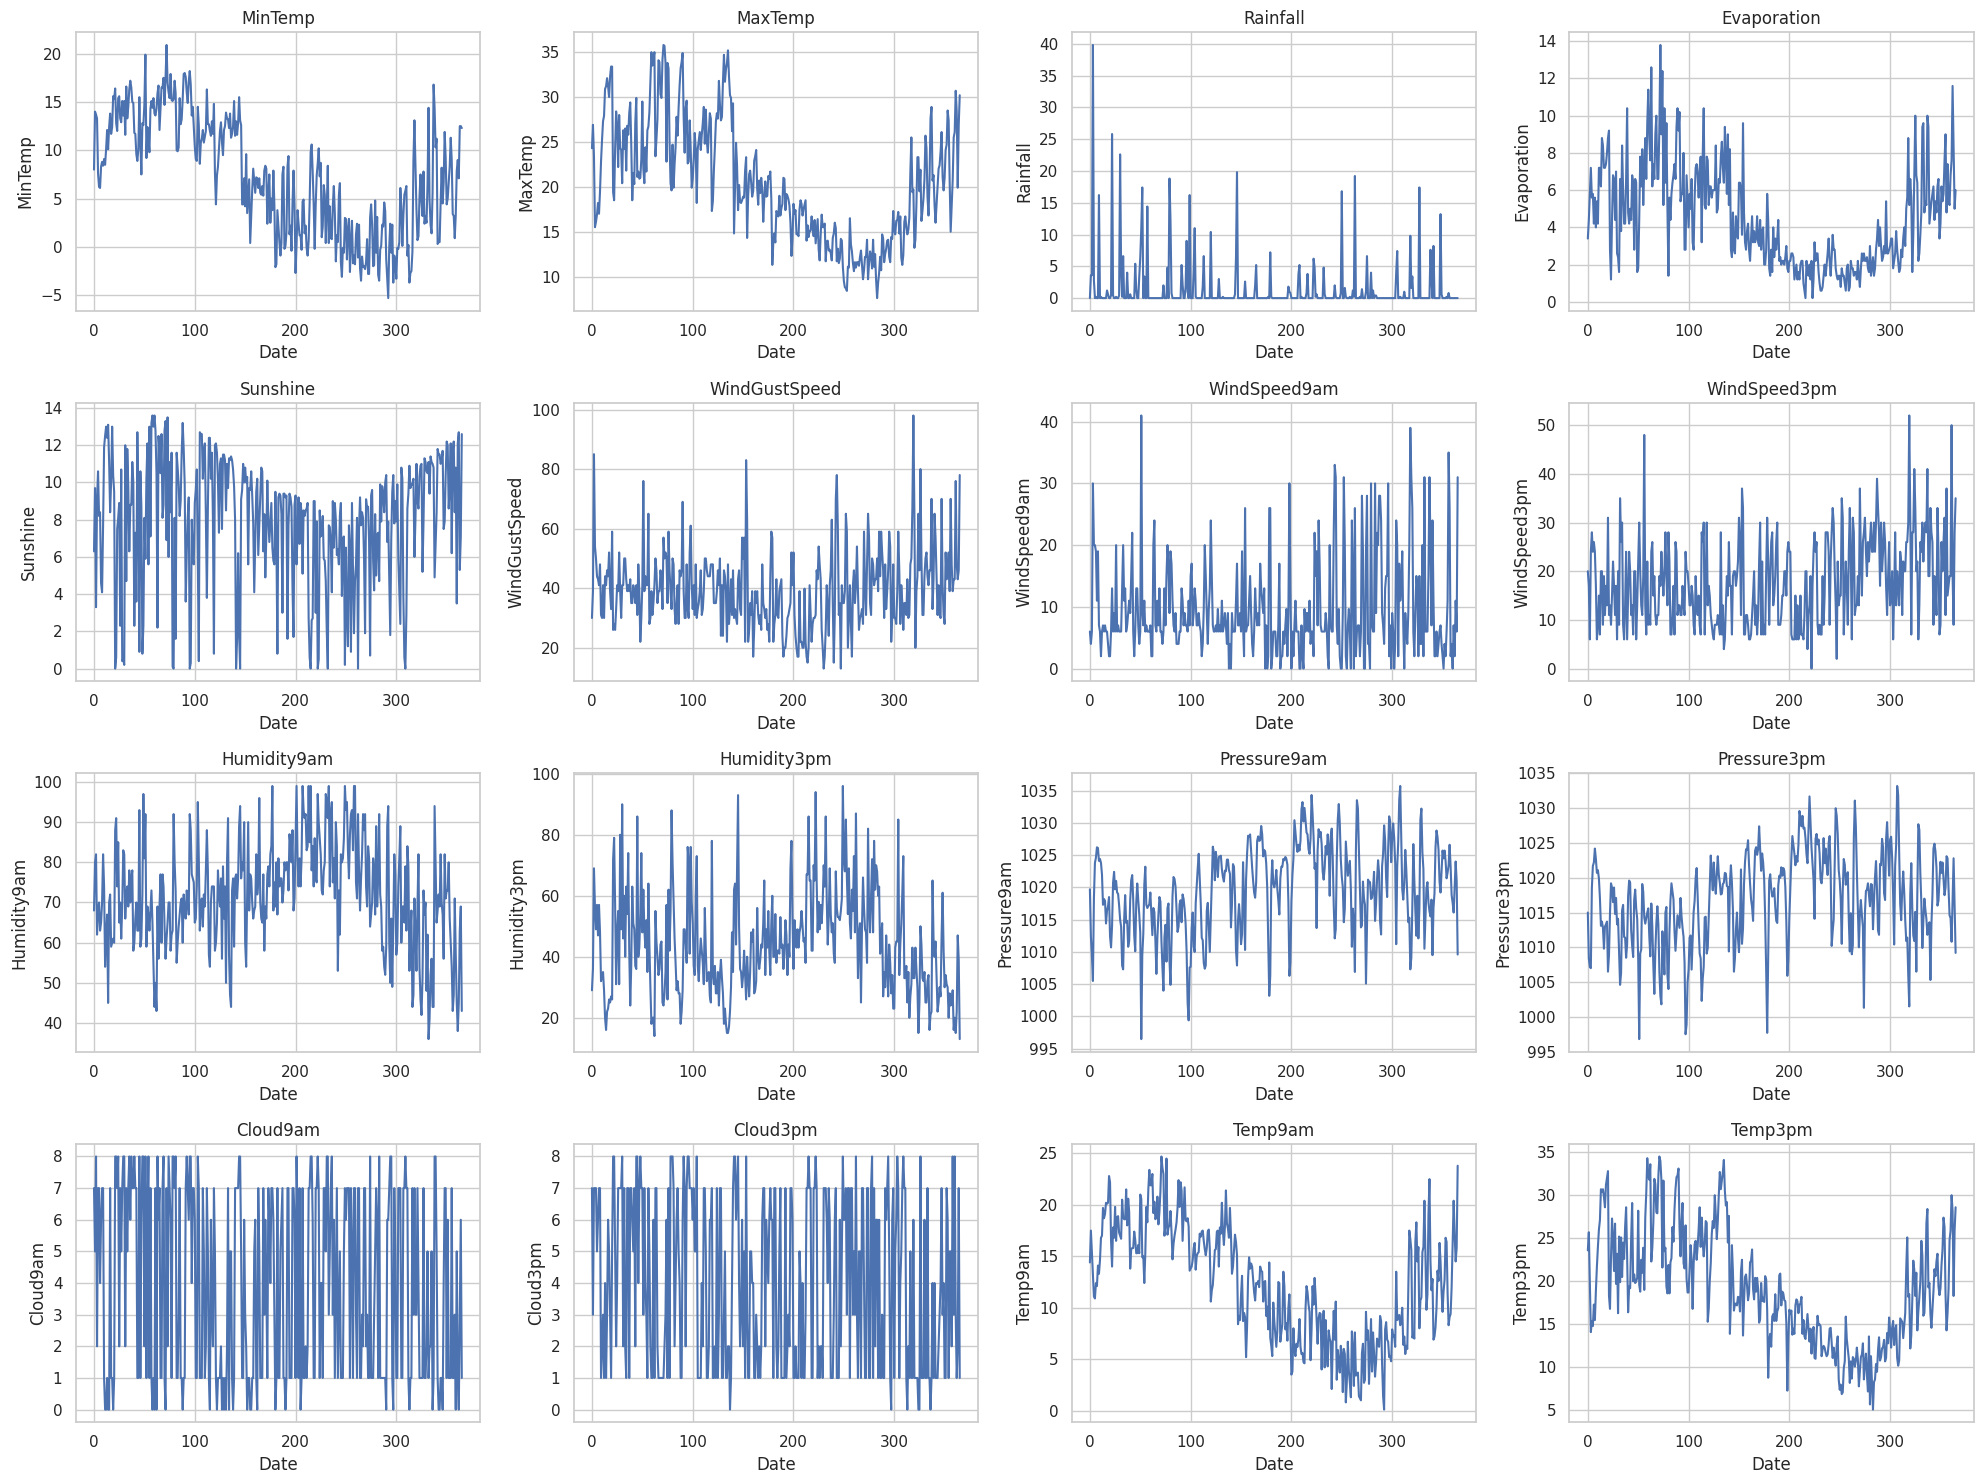

In [12]:
# plot features over time

fig, ax = plt.subplots(4, 4, figsize=(20,15))
for i, column in enumerate(df_num.columns):
    ax[i//4][i%4].plot(df_num[column])
    ax[i//4][i%4].set_title(column)
    ax[i//4][i%4].set_xlabel('Date')
    ax[i//4][i%4].set_ylabel(f'{column}')
fig.tight_layout()
plt.show()



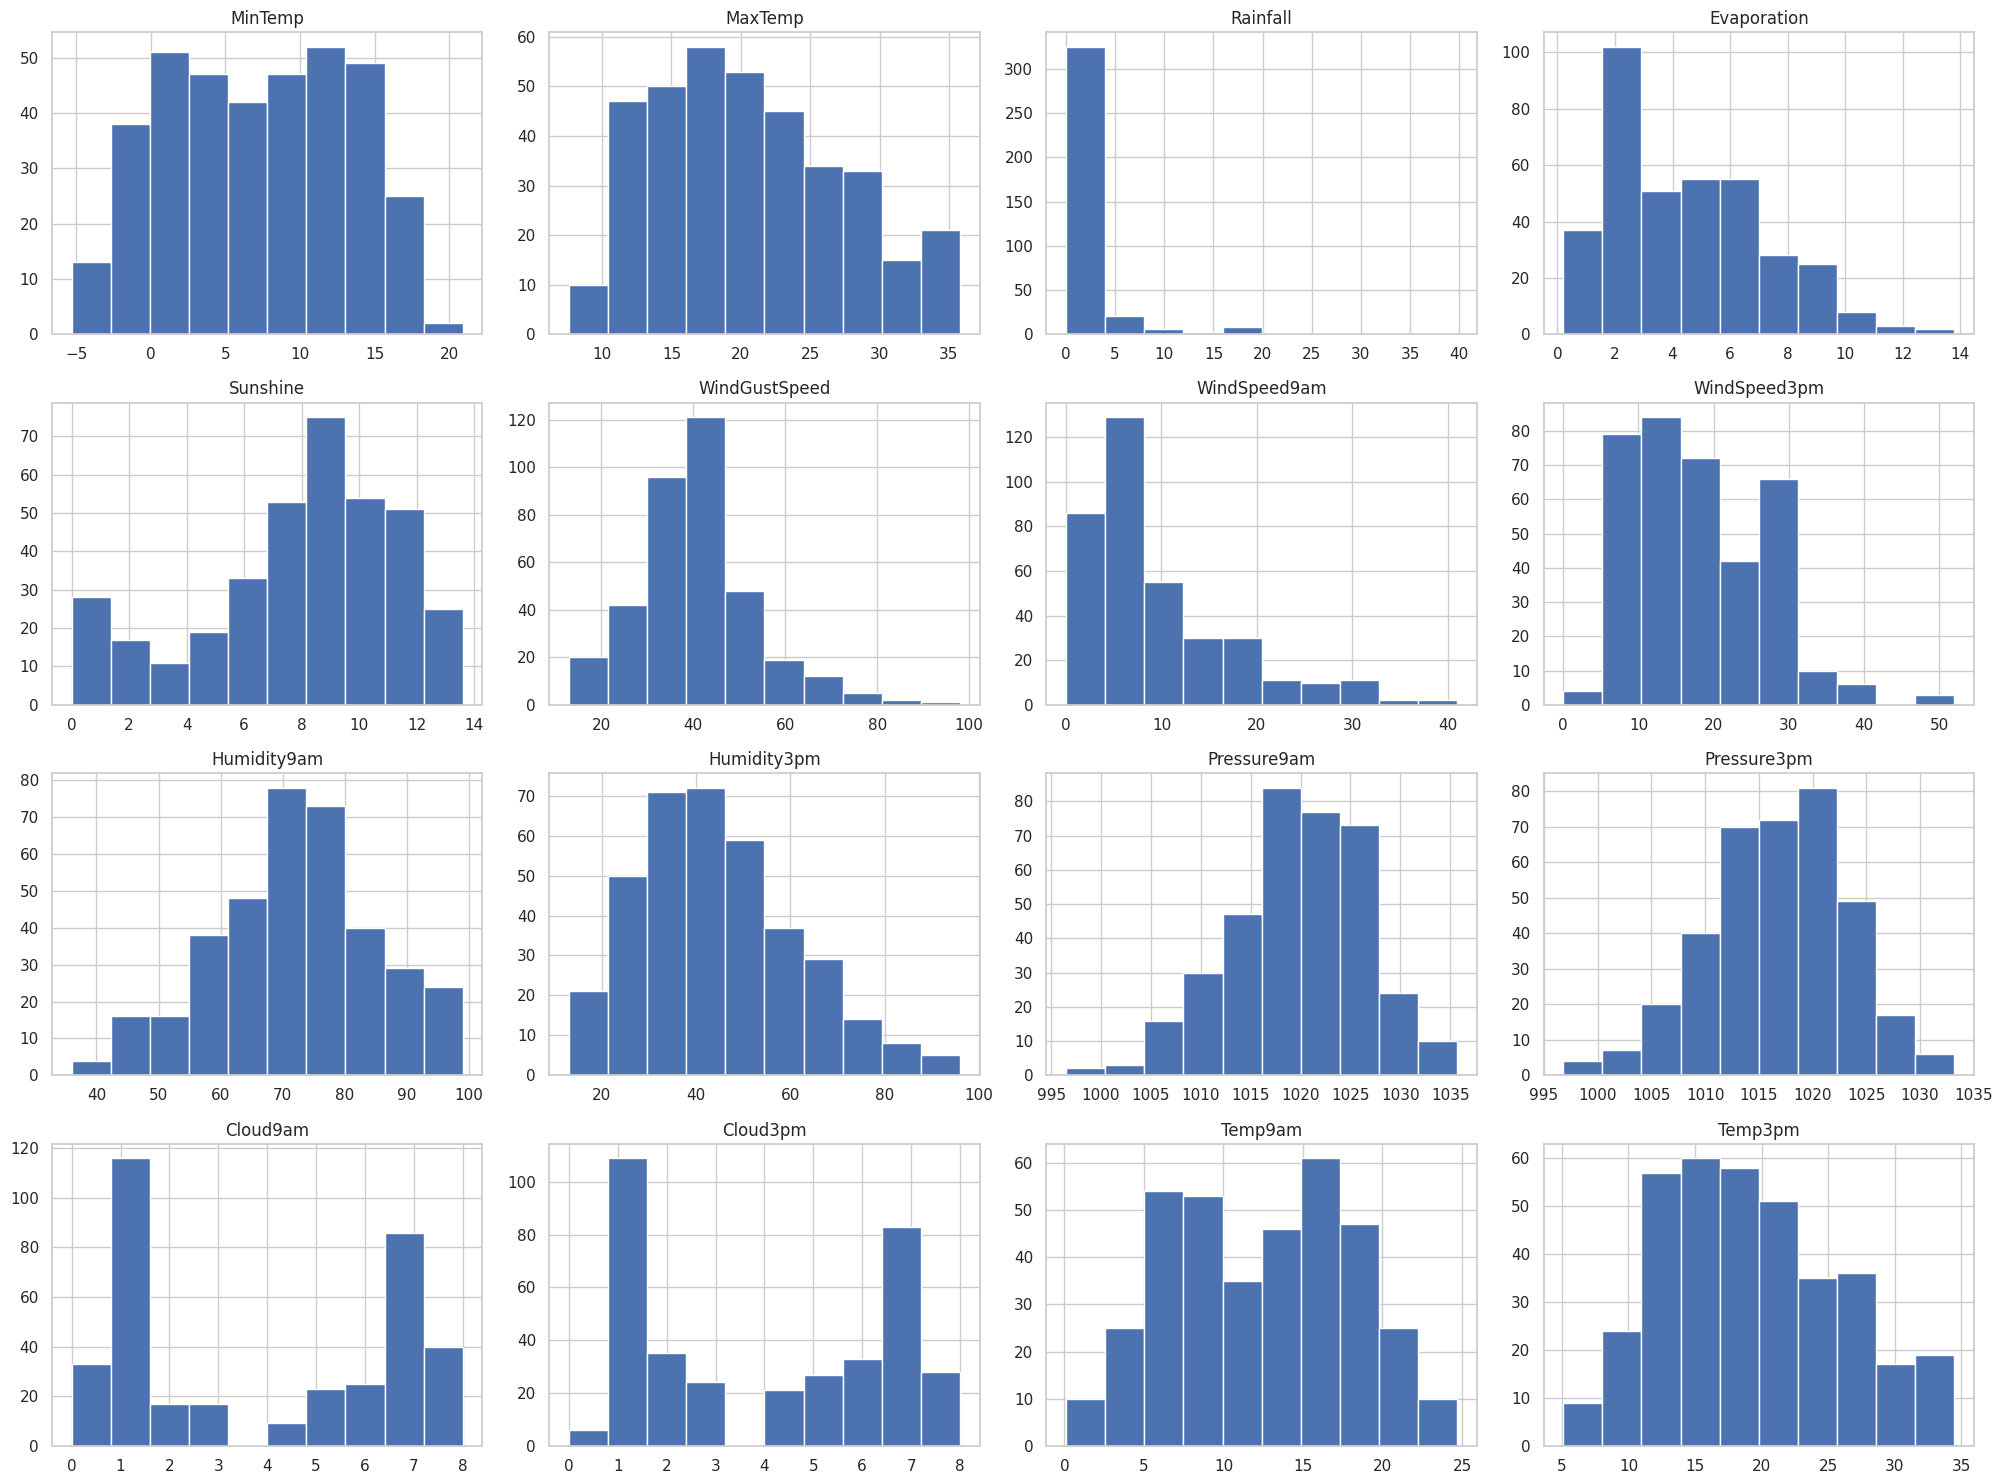

In [13]:
# plot histogram
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
df.hist(figsize=(20,15), ax=ax)
fig.tight_layout()
plt.show()

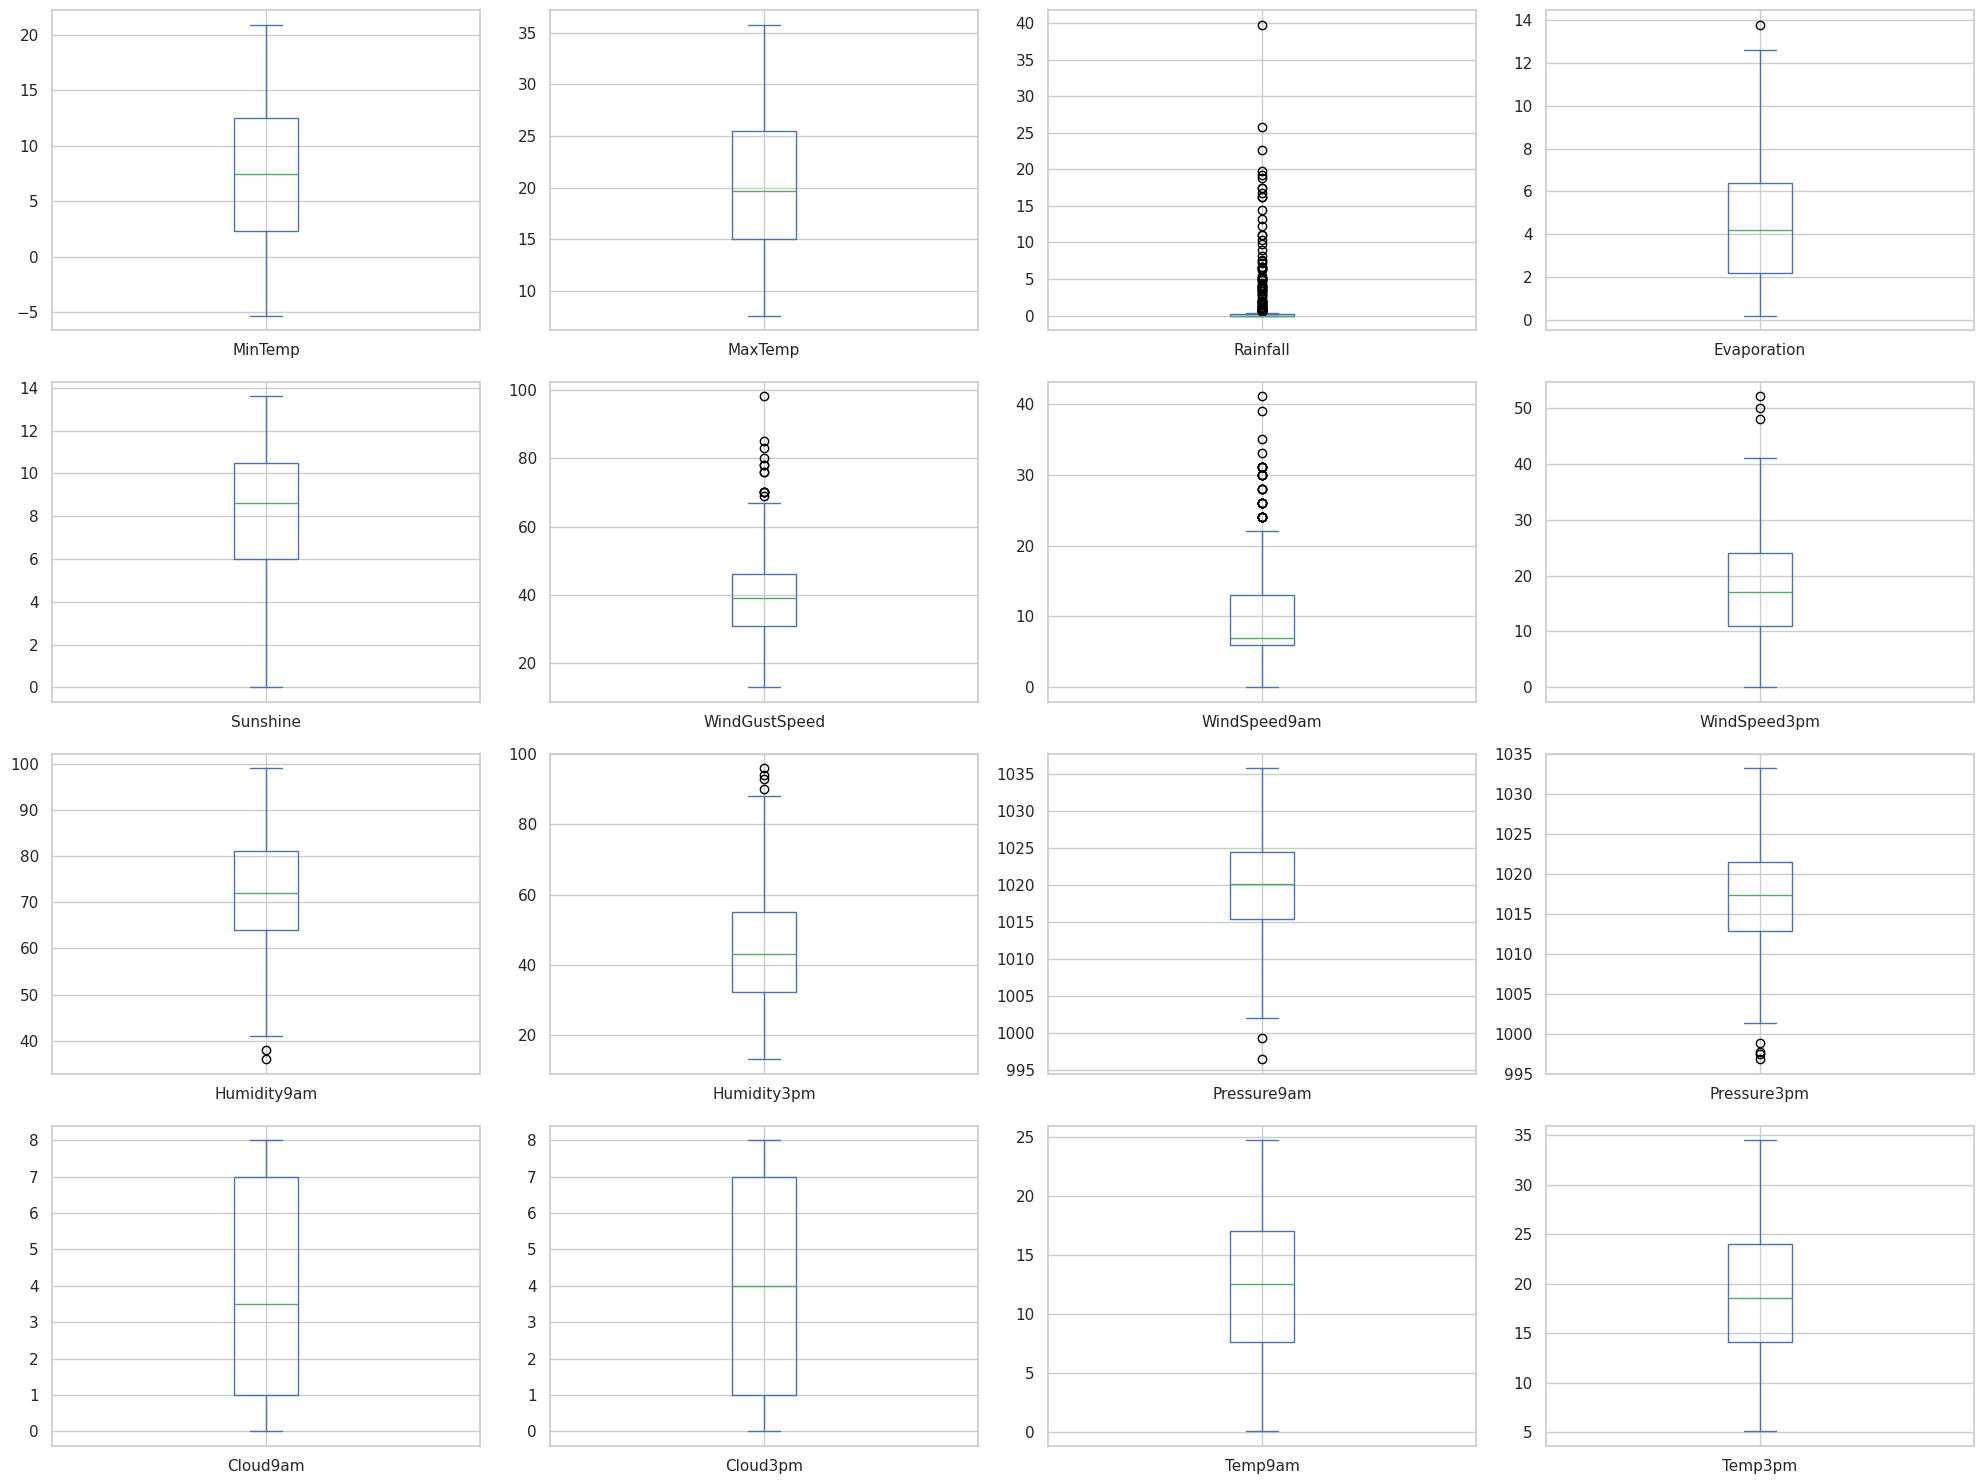

In [14]:
# plot boxplot

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
df.plot(kind='box', subplots=True, layout=(4, 4), ax=ax, fig=fig)
fig.tight_layout()
plt.show()

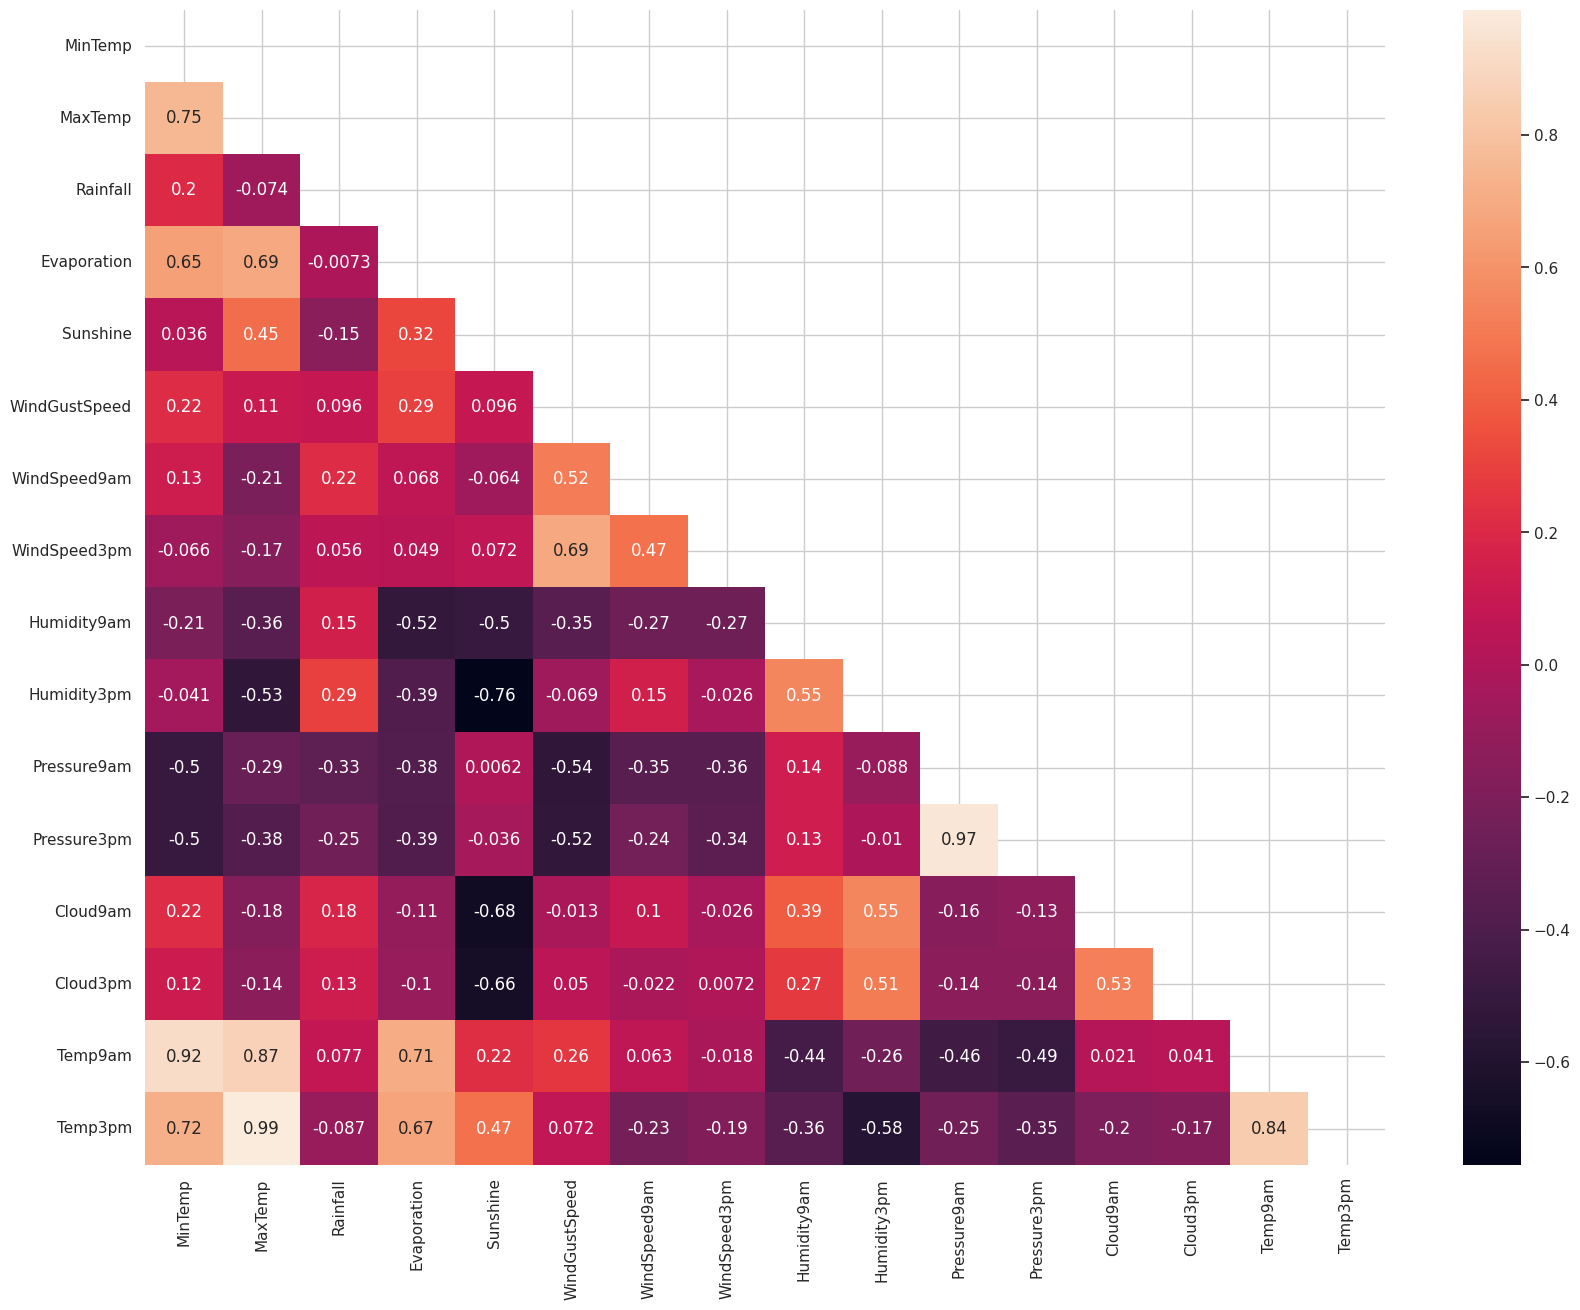

In [15]:
# print correlation matrix and plot heatmap with numerical values with big size
import numpy as np
import seaborn as sns

corr = df_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
sns.heatmap(corr, annot=True, mask=mask, ax=ax)
plt.show()



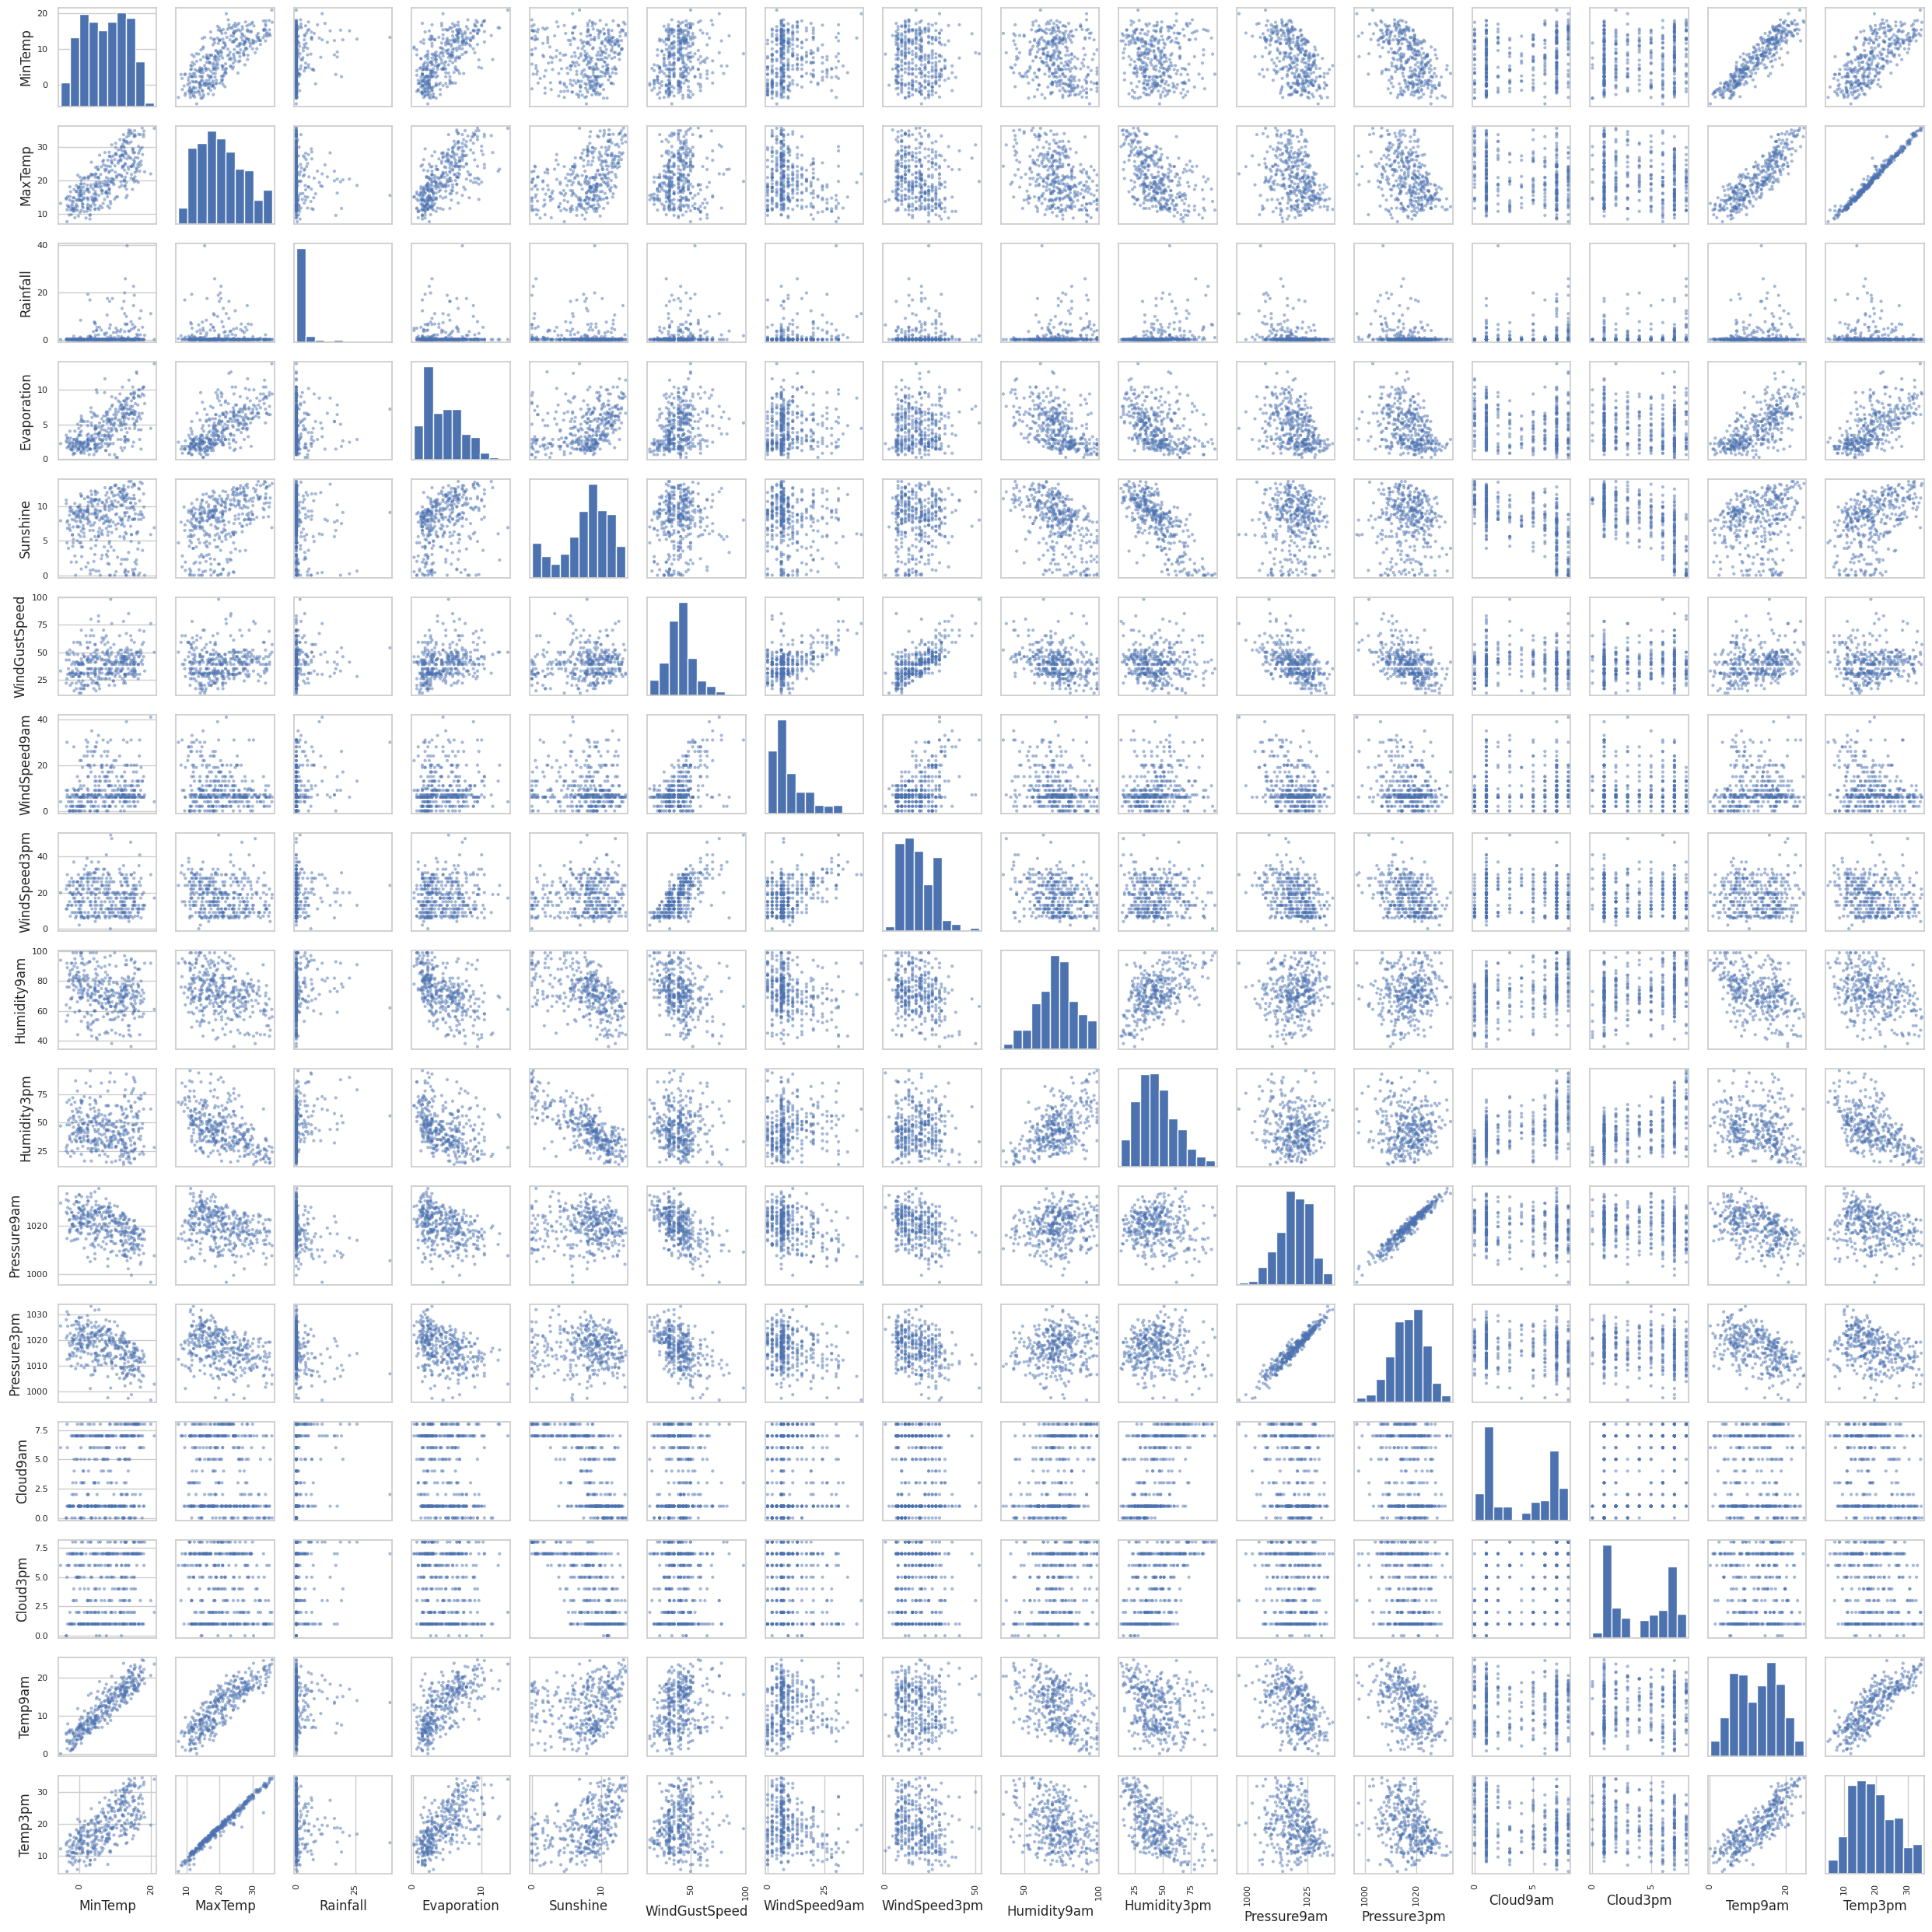

In [16]:
# plot scatter matrix
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(1, 1, figsize=(25, 25))
scatter_matrix(df, ax=ax, grid=True)
fig.tight_layout()
plt.show()

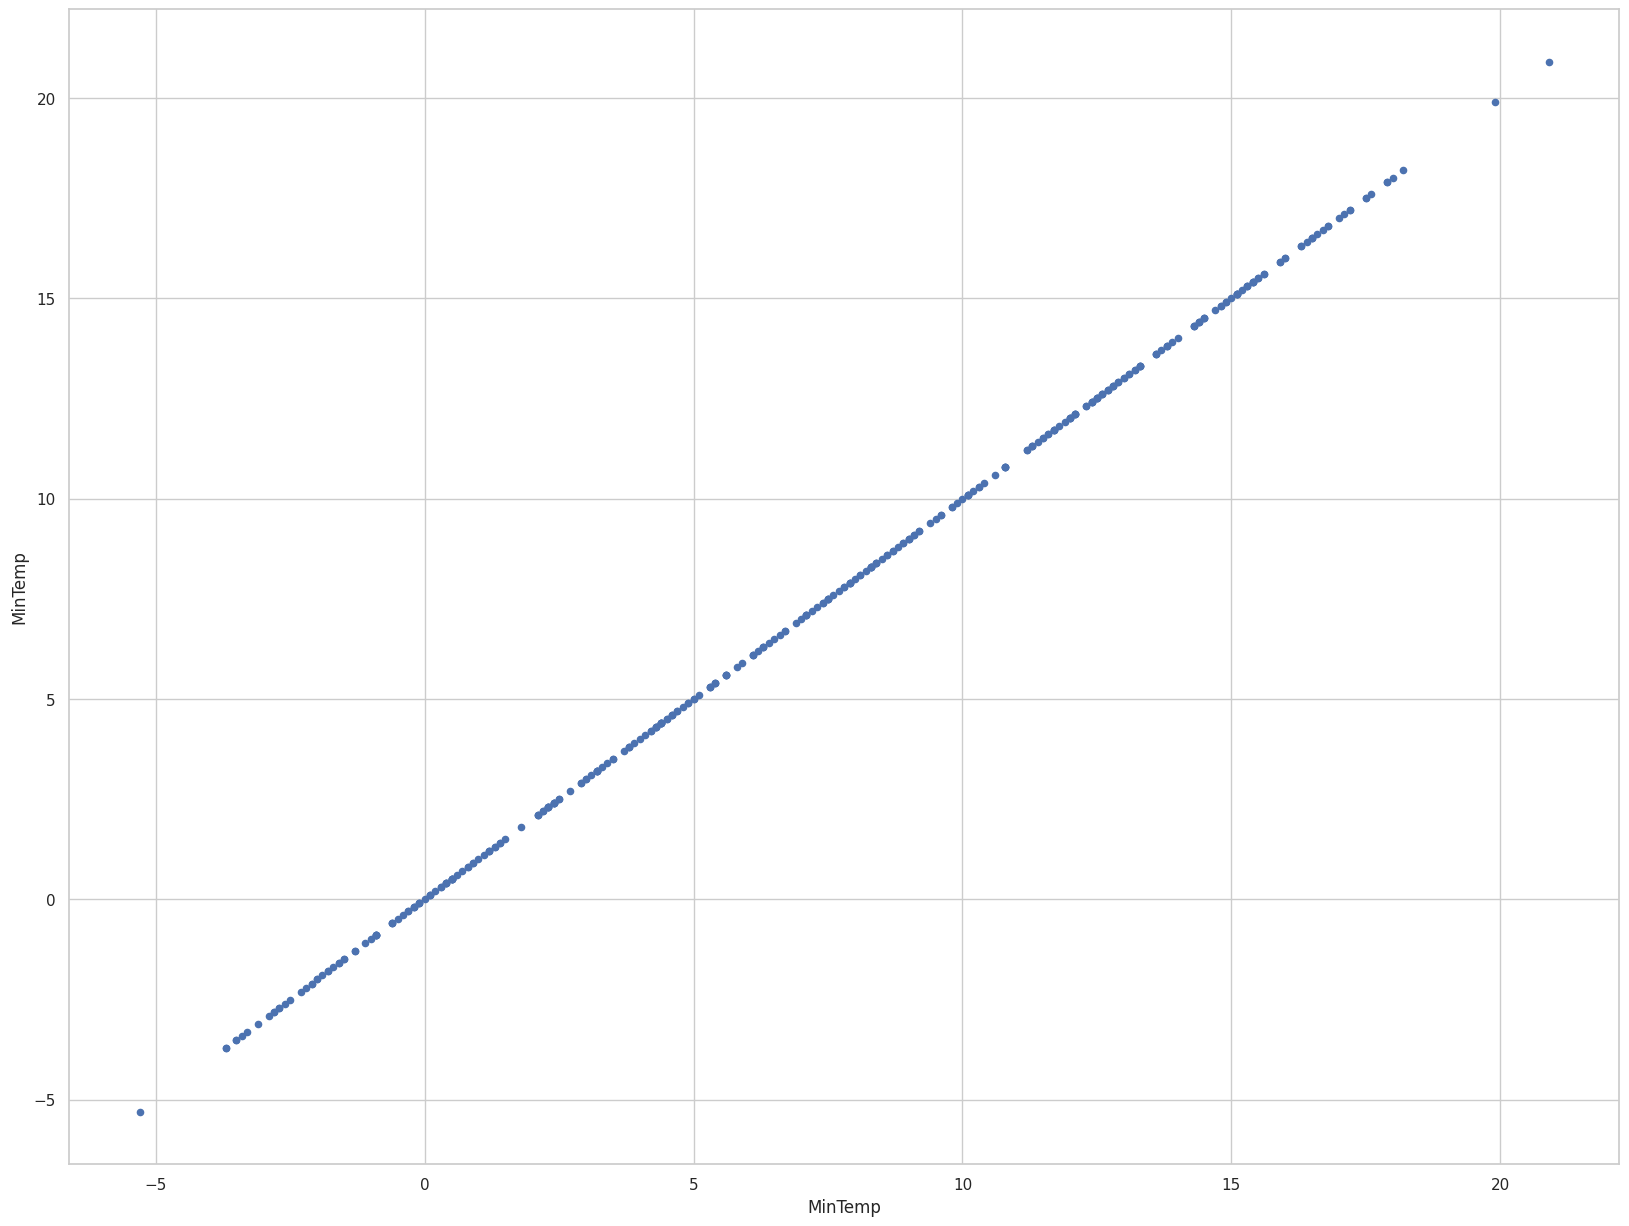

In [17]:
# scater plot one column vs the same
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
df.plot.scatter(x='MinTemp', y='MinTemp', ax=ax)
plt.show()


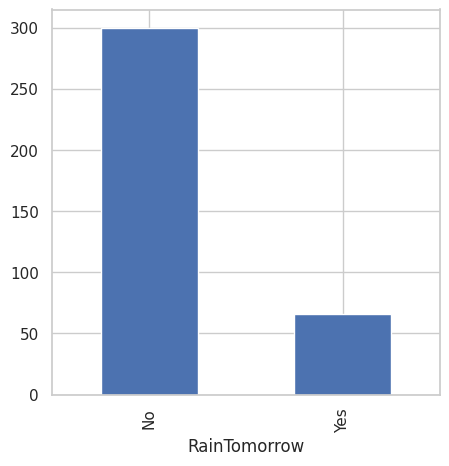

In [18]:
# plot class distribution
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df['RainTomorrow'].value_counts().plot(kind='bar', ax=ax)
plt.show()


Jak widać na wykresie, zmienna celu jest bardzo nie zbalansowana. W związku z tym, aby móc dokładnie ocenić model, należy użyć miary F1.

In [19]:
# compute class distribution in percentage
print('Class distribution in percentage:')
df['RainTomorrow'].value_counts(normalize=True) * 100 # in percentage

Class distribution in percentage:


RainTomorrow
No     81.967213
Yes    18.032787
Name: proportion, dtype: float64

### Wnioski z analizy danych
...TODO

### Przygotowanie danych do trenowania modeli

In [20]:
# encode WindGustDir', 'WindDir9am', 'WindDir3pm', 
df = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype=float)
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0      8.0     24.3       0.0          3.4       6.3           30.0   
1     14.0     26.9       3.6          4.4       9.7           39.0   
2     13.7     23.4       3.6          5.8       3.3           85.0   
3     13.3     15.5      39.8          7.2       9.1           54.0   
4      7.6     16.1       2.8          5.6      10.6           50.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_NNW  \
0           6.0            20           68           29  ...             0.0   
1           4.0            17           80           36  ...             0.0   
2           6.0             6           82           69  ...             0.0   
3          30.0            24           62           56  ...             0.0   
4          20.0            28           68           49  ...             0.0   

   WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
0            1.0           0.0            0.0             0.0             0.0   
1            0.0           0.0            0.0             0.0             0.0   
2            0.0           0.0            0.0             0.0             0.0   
3            0.0           0.0            0.0             0.0             0.0   
4            0.0           0.0            0.0             0.0             0.0   

  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  
0           0.0           0.0             0.0             0.0  
1           0.0           1.0             0.0             0.0  
2           0.0           0.0             0.0             0.0  
3           0.0           1.0             0.0             0.0  
4           0.0           0.0             0.0             0.0  

[5 rows x 65 columns]

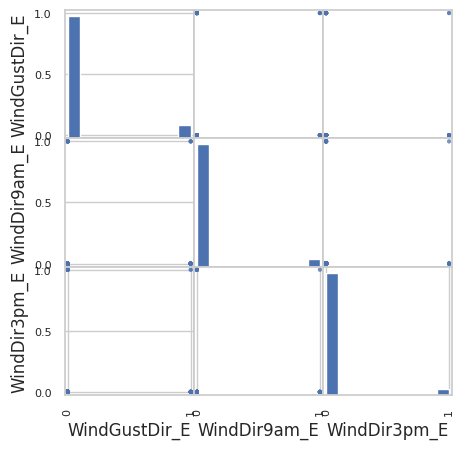

In [21]:
# simple plot with encoded values
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
scatter_matrix(df[['WindGustDir_E', 'WindDir9am_E', 'WindDir3pm_E']], ax=ax)
plt.show()

In [22]:
# split data into df_x and df_y (df_y is RainTomorrow, features are all other columns)
df_x = df.drop('RainTomorrow', axis=1)
df_y = df[['RainTomorrow']]
print(df_x.shape, df_y.shape)

(366, 64) (366, 1)


In [23]:
# map yes/no to 1/0 in df_y
df_y = df_y['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_y.head()

0    1
1    1
2    1
3    1
4    0
Name: RainTomorrow, dtype: int64

In [24]:
# wind direction is categorical data, so we need to convert it to numerical data
# use one hot encoding
# df_x = pd.get_dummies(df_x, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])
# df_x.head()
df_x.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
       'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE',
       'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
       'WindDir3pm_NNW

In [25]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42 ,stratify=df_y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(292, 64) (74, 64) (292,) (74,)


In [26]:
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(292, 64) (74, 64) (292,) (74,)


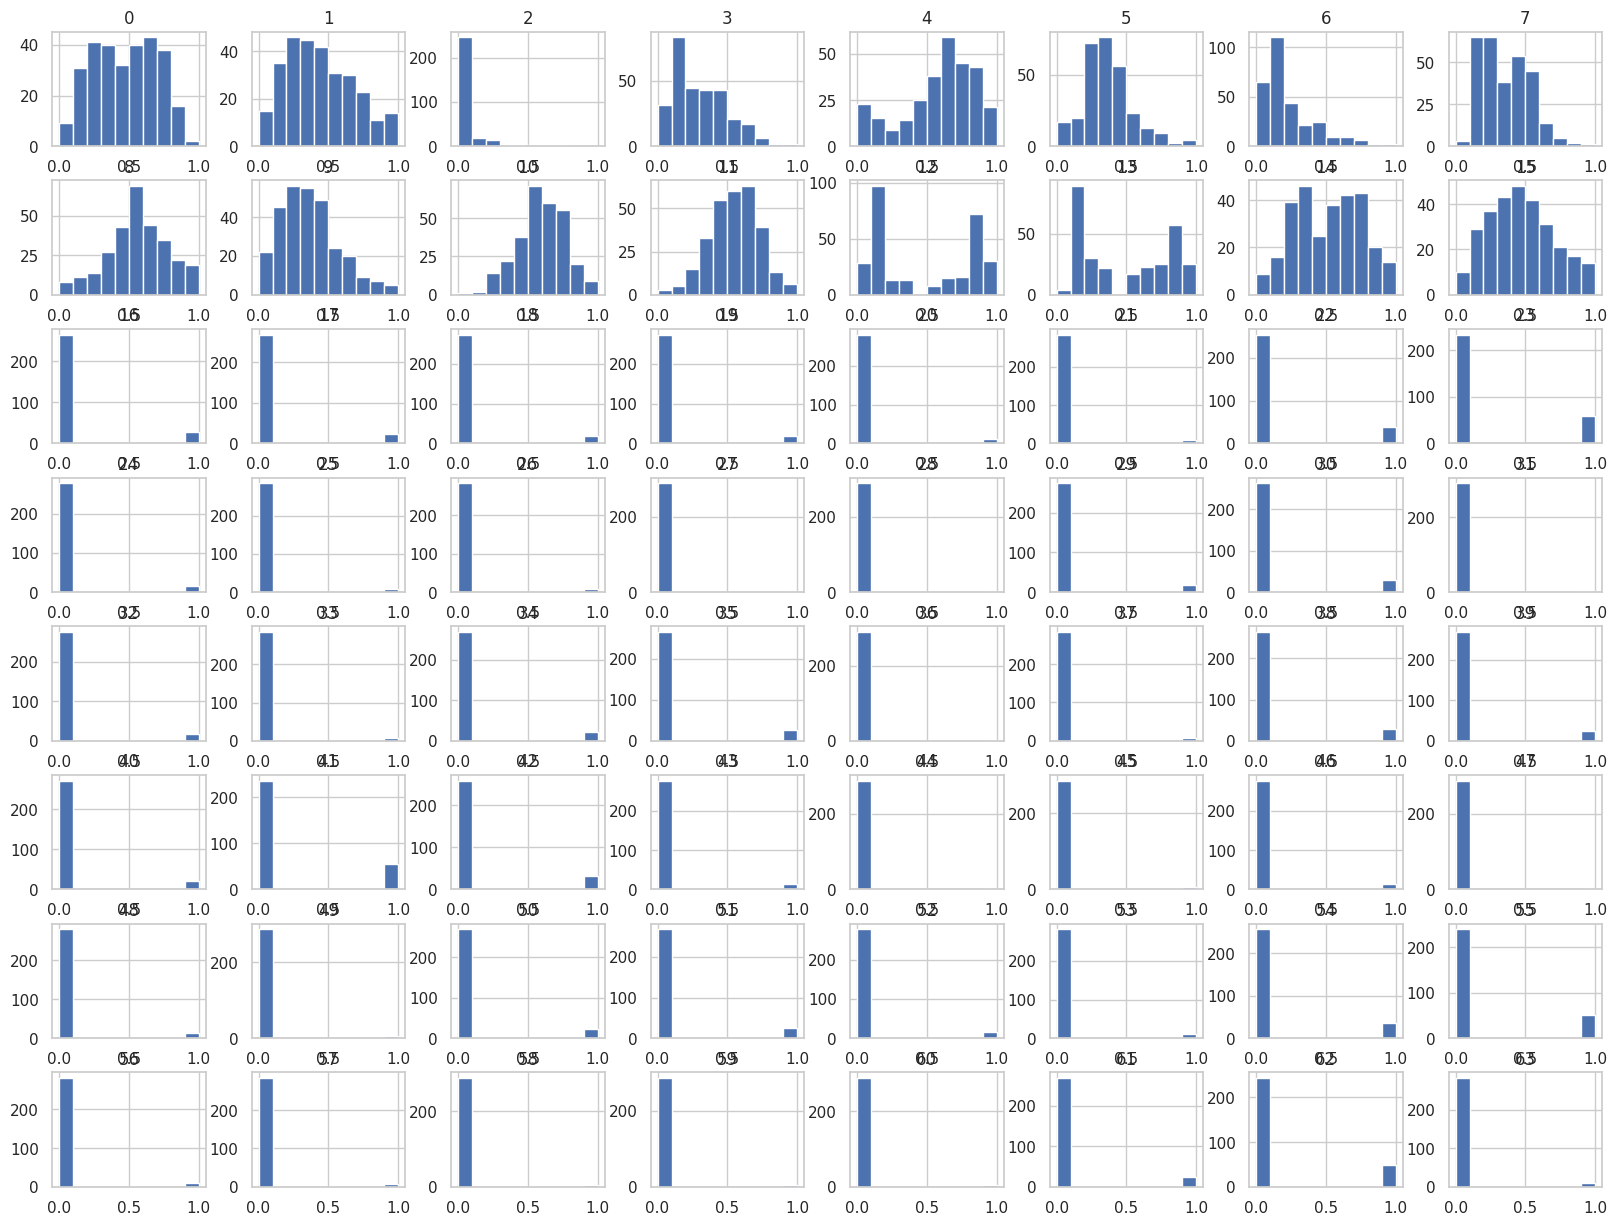

In [27]:
# plor normalized data histogram
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
pd.DataFrame(x_train).hist(ax=ax)
plt.show()

#### Kilka funkcji pomocniczych do oceny modeli

In [28]:
# function to print accuracy, precision, recall, f1 score, confusion matrix
def print_metrics(y_test, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred))
    print('F1 score: ', f1_score(y_test, y_pred))
    print('Confusion matrix: ', confusion_matrix(y_test, y_pred))

In [29]:
## function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
    from sklearn.metrics import confusion_matrix
    fix, ax = plt.subplots(1, 1, figsize=(5, 5))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(ax=ax)
    plt.show()



In [30]:
## function to get model metrics to dict
def get_metrics(y_test, y_pred, name:str) -> dict:
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    metrics = {}
    metrics['model'] = name
    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['precision'] = precision_score(y_test, y_pred)
    metrics['recall'] = recall_score(y_test, y_pred)
    metrics['f1_score'] = f1_score(y_test, y_pred)
    metrics['confusion_matrix'] = confusion_matrix(y_test, y_pred)
    return metrics

### Trening modeli

In [31]:
# dictionary to store metrics
all_metrics = {}

#### Regresja logistyczna

Accuracy:  0.8513513513513513
Precision:  0.625
Recall:  0.38461538461538464
F1 score:  0.4761904761904762
Confusion matrix:  [[58  3]
 [ 8  5]]


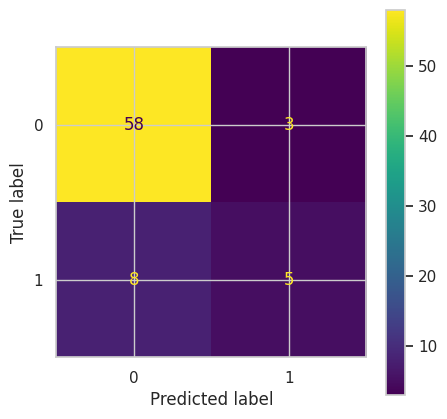

In [32]:
## train serveral models
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
all_metrics['LogisticRegression'] = get_metrics(y_test, y_pred, 'LogisticRegression')

In [33]:
# # plot only roc curve
# from sklearn.metrics import roc_curve, RocCurveDisplay
# y_pred_proba = model.predict_proba(x_test)[:,1]
# fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
# roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
# plt.show()


In [34]:
# # plot ROC curve
# from sklearn.metrics import roc_curve, auc
# y_pred_proba = model.predict_proba(x_test)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# roc_auc = auc(fpr, tpr)
# print('AUC:', roc_auc)
# plt.figure(figsize=(10, 6))
# plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], label='Random guess', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (FPR)')
# plt.ylabel('True Positive Rate (TPR)')
# # legend
# plt.legend()




#### Drzewo decyzyjne

Accuracy:  0.7297297297297297
Precision:  0.34782608695652173
Recall:  0.6153846153846154
F1 score:  0.4444444444444444
Confusion matrix:  [[46 15]
 [ 5  8]]


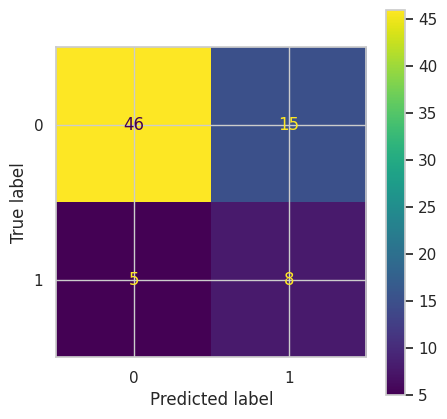

In [35]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
all_metrics['DecisionTreeClassifier'] = get_metrics(y_test, y_pred, 'DecisionTreeClassifier')

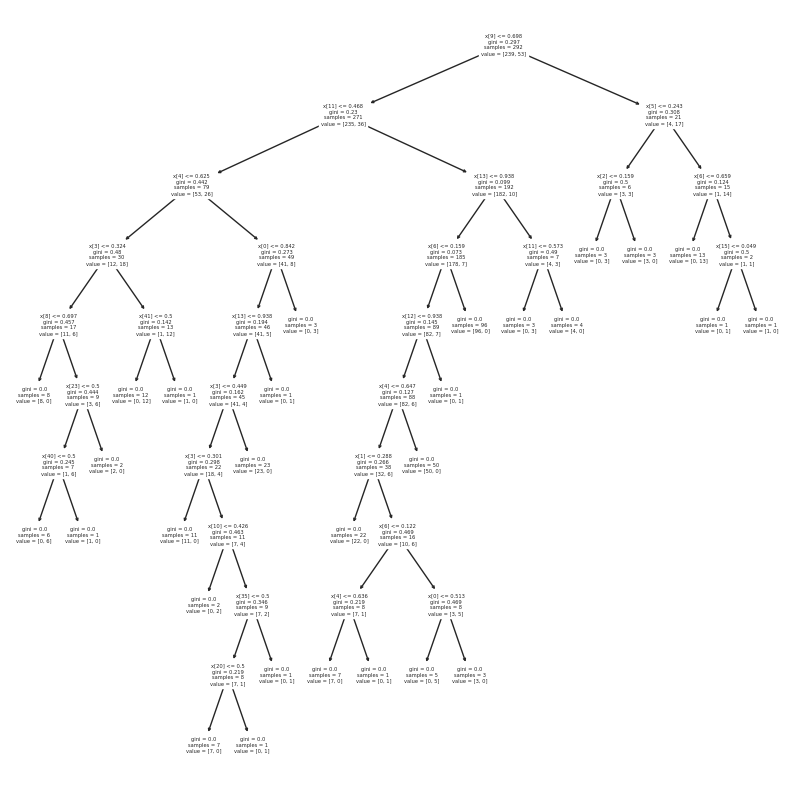

In [36]:
## just for fun, plot decision tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_tree(model, ax=ax)
plt.show()

#### Las losowy

Accuracy:  0.8783783783783784
Precision:  0.75
Recall:  0.46153846153846156
F1 score:  0.5714285714285714
Confusion matrix:  [[59  2]
 [ 7  6]]


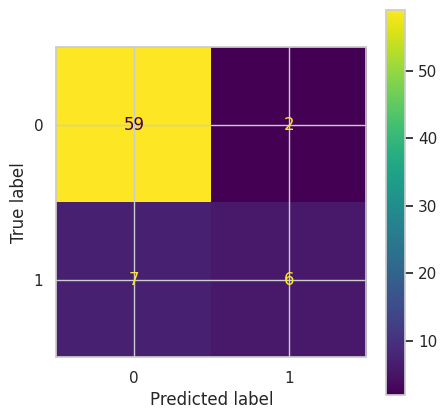

In [37]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
all_metrics['RandomForestClassifier'] = get_metrics(y_test, y_pred, 'RandomForestClassifier')

#### K najbliższych sąsiadów

Accuracy:  0.8513513513513513
Precision:  0.75
Recall:  0.23076923076923078
F1 score:  0.3529411764705882
Confusion matrix:  [[60  1]
 [10  3]]


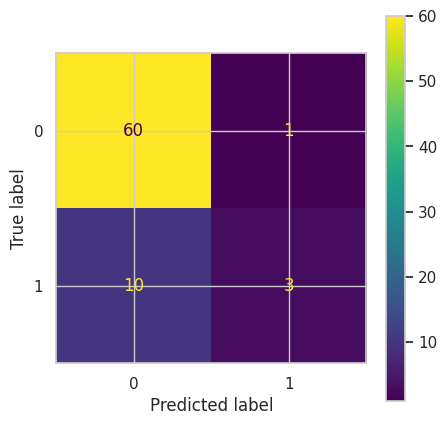

In [38]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
all_metrics['KNeighborsClassifier'] = get_metrics(y_test, y_pred, 'KNeighborsClassifier')


#### Maszyna wektorów nośnych

Accuracy:  0.8648648648648649
Precision:  1.0
Recall:  0.23076923076923078
F1 score:  0.375
Confusion matrix:  [[61  0]
 [10  3]]


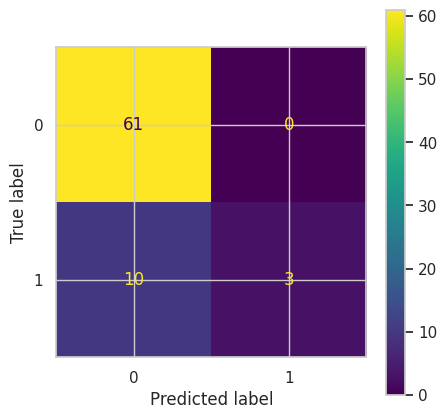

In [39]:
# SVM
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
all_metrics['SVC'] = get_metrics(y_test, y_pred, 'SVC')


#### Perceptron

Accuracy:  0.8243243243243243
Precision:  0.5
Recall:  0.38461538461538464
F1 score:  0.4347826086956522
Confusion matrix:  [[56  5]
 [ 8  5]]


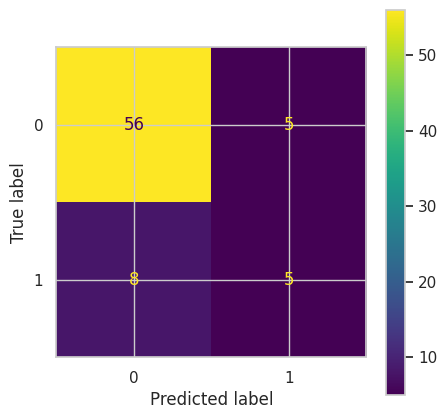

In [40]:
# Perceptron
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
all_metrics['Perceptron'] = get_metrics(y_test, y_pred, 'Perceptron')


#### Stochastyczny spadek gradientu

Accuracy:  0.7432432432432432
Precision:  0.35
Recall:  0.5384615384615384
F1 score:  0.4242424242424242
Confusion matrix:  [[48 13]
 [ 6  7]]


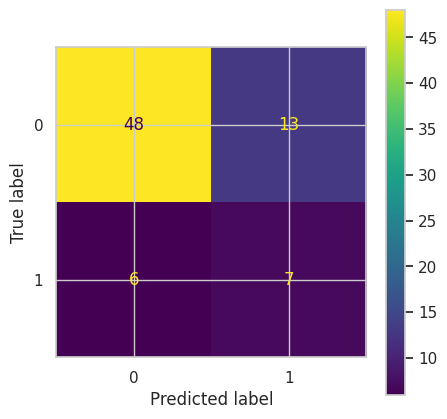

In [41]:
# Gradient Descent
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
all_metrics['SGDClassifier'] = get_metrics(y_test, y_pred, 'SGDClassifier')


### Ocena modeli

In [42]:
# prepare metrics dataframe for visualization
metrics = pd.DataFrame(all_metrics).T
metrics = metrics.drop(columns=['model'])
metrics.index.name = 'model'
metrics

accuracy precision    recall  f1_score  \
model                                                            
LogisticRegression      0.851351     0.625  0.384615   0.47619   
DecisionTreeClassifier   0.72973  0.347826  0.615385  0.444444   
RandomForestClassifier  0.878378      0.75  0.461538  0.571429   
KNeighborsClassifier    0.851351      0.75  0.230769  0.352941   
SVC                     0.864865       1.0  0.230769     0.375   
Perceptron              0.824324       0.5  0.384615  0.434783   
SGDClassifier           0.743243      0.35  0.538462  0.424242   

                          confusion_matrix  
model                                       
LogisticRegression       [[58, 3], [8, 5]]  
DecisionTreeClassifier  [[46, 15], [5, 8]]  
RandomForestClassifier   [[59, 2], [7, 6]]  
KNeighborsClassifier    [[60, 1], [10, 3]]  
SVC                     [[61, 0], [10, 3]]  
Perceptron               [[56, 5], [8, 5]]  
SGDClassifier           [[48, 13], [6, 7]]

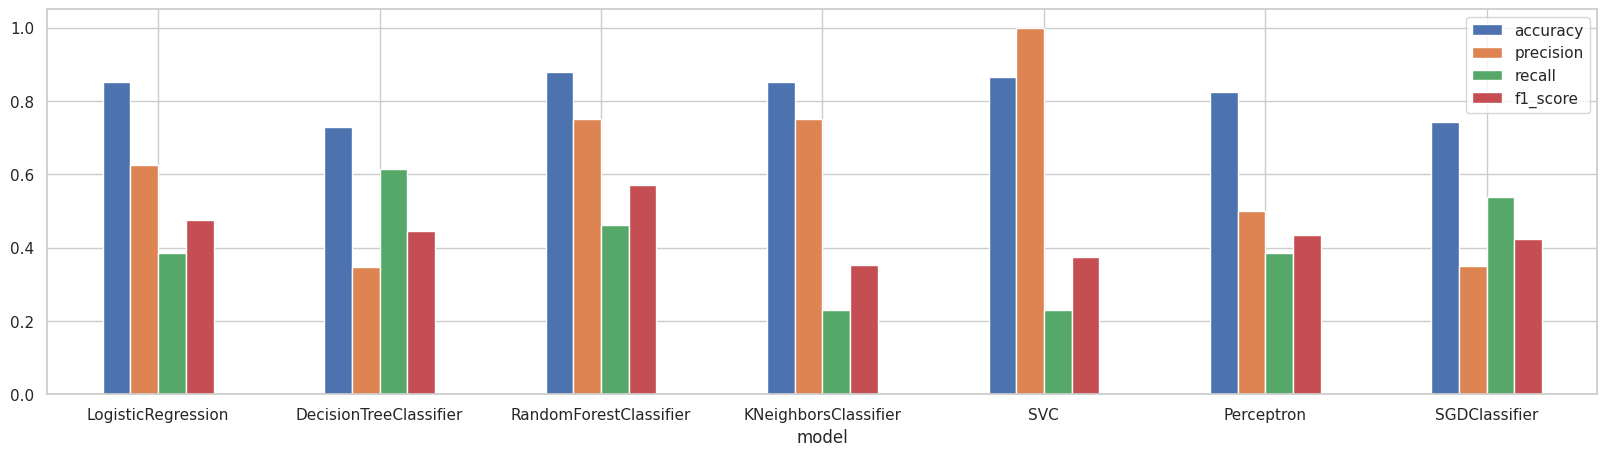

In [43]:
# plot metrics bar chart

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
metrics.drop(['confusion_matrix'], axis=1).plot(kind='bar', ax=ax)
ax.set_xticklabels(metrics.index, rotation=0)
plt.show()

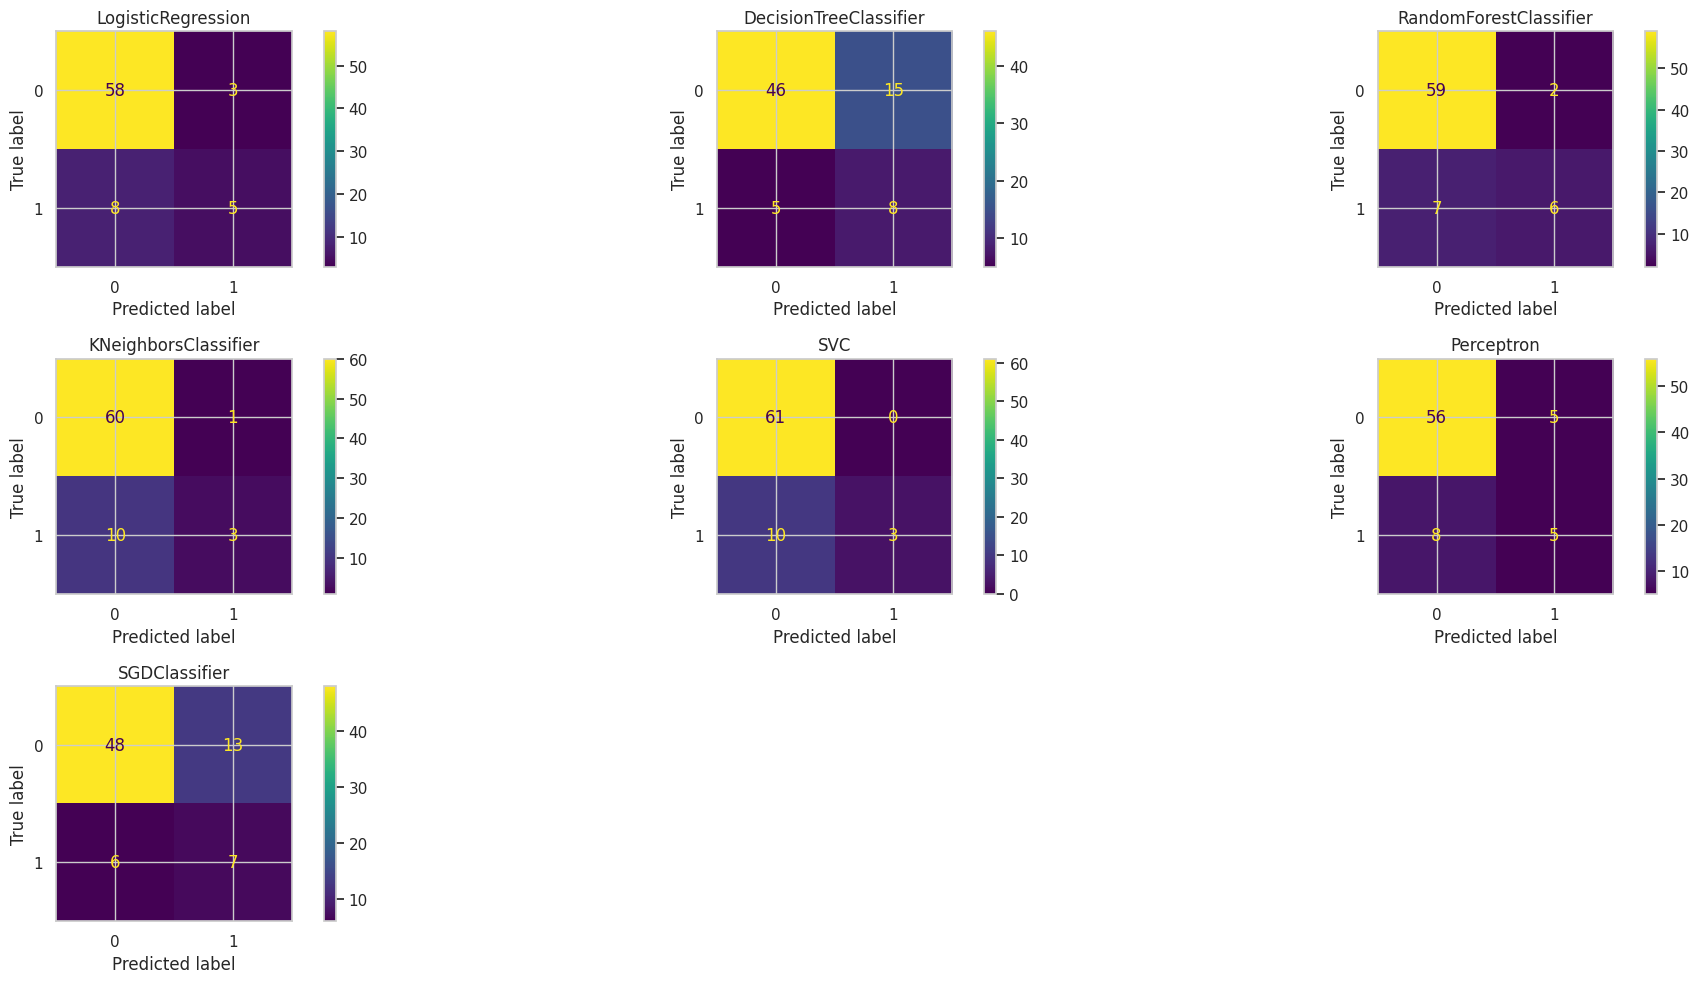

In [44]:
# plot confusion matrix for all models
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
for i, model in enumerate(all_metrics.keys()):
    ConfusionMatrixDisplay(all_metrics[model]['confusion_matrix']).plot(ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(model)


# delete empty plots
for i in range(len(all_metrics.keys()), 9):
    fig.delaxes(ax[i//3, i%3])

fig.tight_layout()
plt.show()


In [45]:
# find best model 
metrics.sort_values(by='f1_score', ascending=False)
print('Best model is: ', metrics.sort_values(by='f1_score', ascending=False).index[0])
print('F1 score tells us how good is our model, it is harmonic mean of precision and recall, so it is good to use it as a metric for our model')

Best model is:  RandomForestClassifier
F1 score tells us how good is our model, it is harmonic mean of precision and recall, so it is good to use it as a metric for our model


# Eksperymenty
### Test PCA
Chciałem sprawdzić, czy zredukowanie wymiarowości danych za pomocą PCA poprawi wyniki modeli. Niestety, okazało się, że nie. Wyniki są gorsze niż bez PCA, choć różnica nie jest duża, ale precyzja jest wyższa.

Chciałem również poznać najważniejsze cechy, które wpływają na wynik modelu.

In [46]:
# use PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape, x_test_pca.shape)


(292, 41) (74, 41)


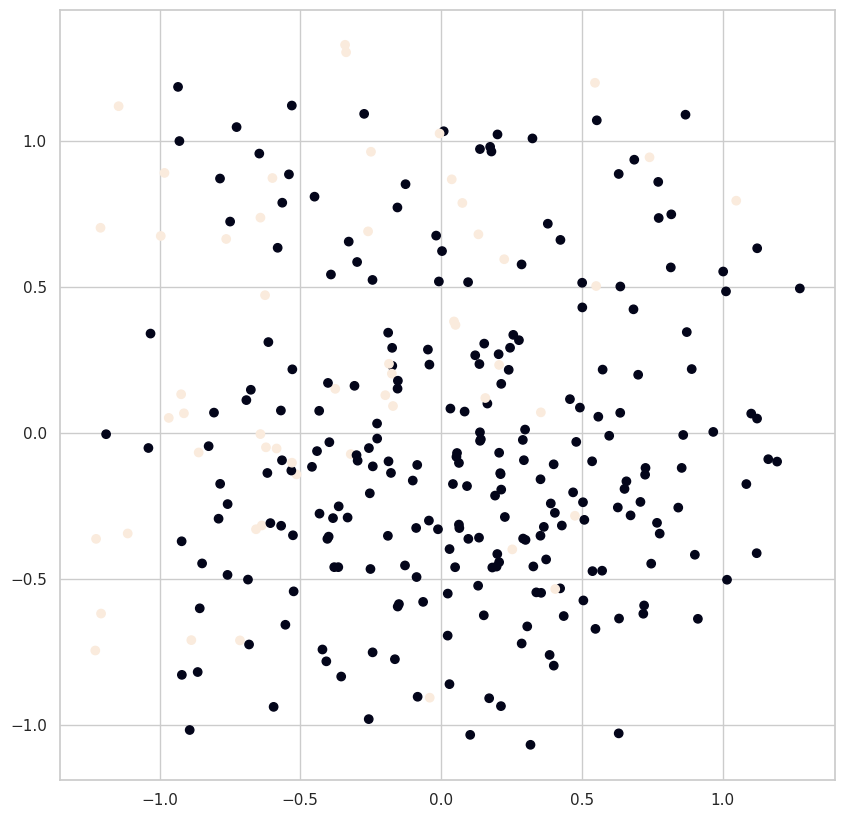

In [47]:
# plot PCA data

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train)
plt.show()


In [48]:
# get top 5 features sorted form pca and get their names
top_5_features = np.argsort(pca.components_[0])[-5:]
# mayby inverse
top_5_features_names = df_x.columns[top_5_features]
# NOTE: it is reversed, so we need to reverse it again
top_5_features_names = top_5_features_names[::-1]
top_5_features_names

Index(['Sunshine', 'MaxTemp', 'Temp3pm', 'Temp9am', 'Evaporation'], dtype='object')

In [49]:

# get index of top 3 features from PCA, and get their names
top3_features = np.argsort(pca.components_[0])[-3:][::-1]

print(top3_features)
# Note: it is reversed, so we need to reverse it again
top3_features_names = df_x.columns[top3_features]
top3_features_names


[ 4  1 15]


Index(['Sunshine', 'MaxTemp', 'Temp3pm'], dtype='object')

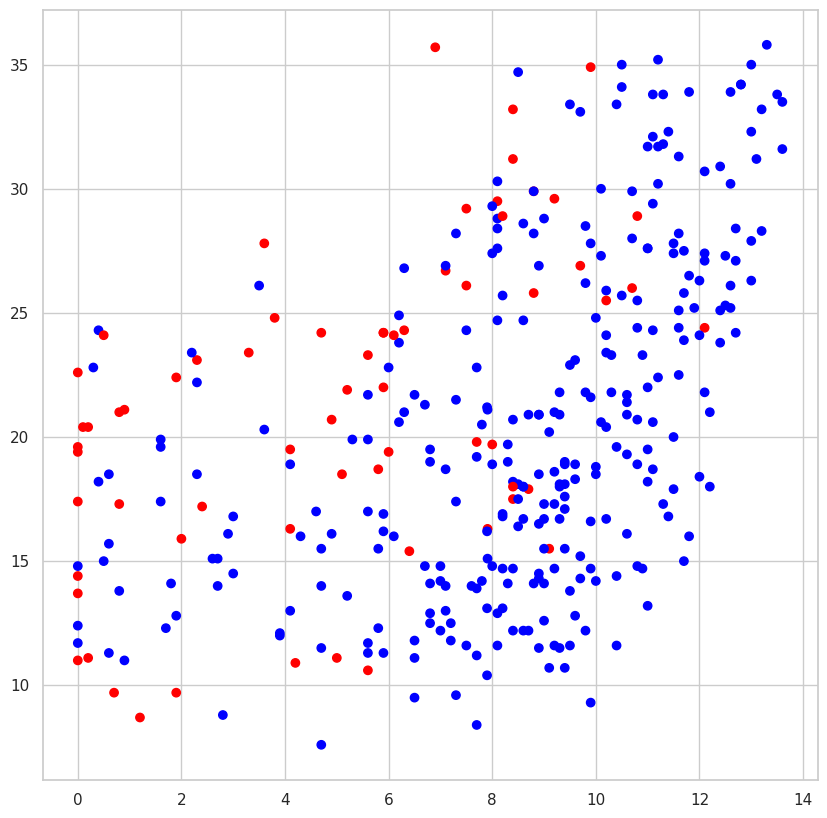

In [50]:
# plot top 2 features df_x 
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(df_x.iloc[:,top3_features[0]], df_x.iloc[:,top3_features[1]], c=['red' if y == 1 else 'blue' for y in df_y])
plt.show()


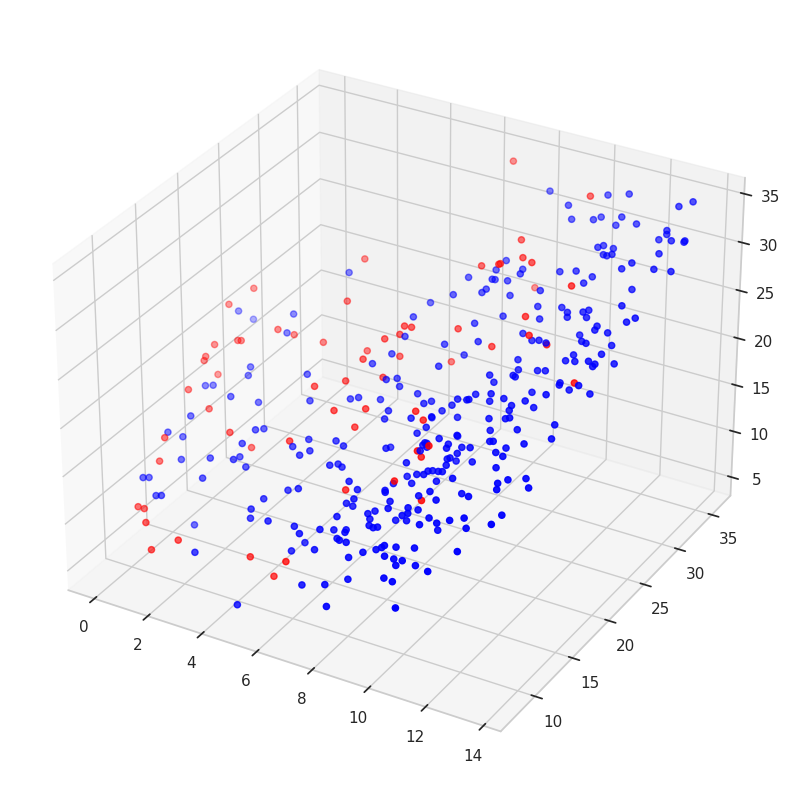

In [51]:
# plot 3d plot with top 3 features
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_x.iloc[:,top3_features[0]], df_x.iloc[:,top3_features[1]], df_x.iloc[:,top3_features[2]], c=['red' if y == 1 else 'blue' for y in df_y])
plt.show()


### Na tym wykresie 3D wyraźnie widać podział na 2 grupy

In [52]:
# find best model 
best_model = metrics.sort_values(by='f1_score', ascending=False).index[0]
print('Best model is: ', best_model)

Best model is:  RandomForestClassifier


Accuracy:  0.8243243243243243
Precision:  0.5
Recall:  0.07692307692307693
F1 score:  0.13333333333333336
Confusion matrix:  [[60  1]
 [12  1]]


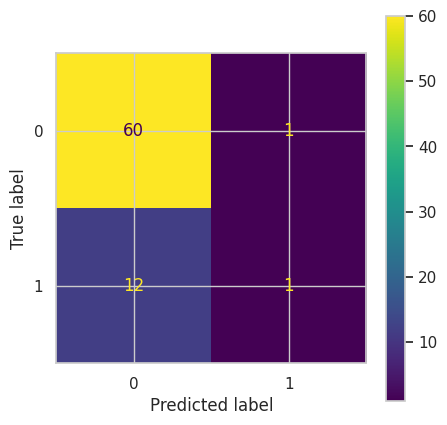

In [53]:
if best_model == 'LogisticRegression':
    model = LogisticRegression()
elif best_model == 'DecisionTreeClassifier':
    model = DecisionTreeClassifier()
elif best_model == 'RandomForestClassifier':
    model = RandomForestClassifier()
elif best_model == 'KNeighborsClassifier':
    model = KNeighborsClassifier()
elif best_model == 'SVC':
    model = SVC()
elif best_model == 'Perceptron':
    model = Perceptron()
elif best_model == 'SGDClassifier':
    model = SGDClassifier()
else:
    model = None
    print('Model not found')

if model is not None:
    model.fit(x_train_pca, y_train)
    y_pred = model.predict(x_test_pca)
    print_metrics(y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred)
    all_metrics['PCA'] = get_metrics(y_test, y_pred, 'PCA')


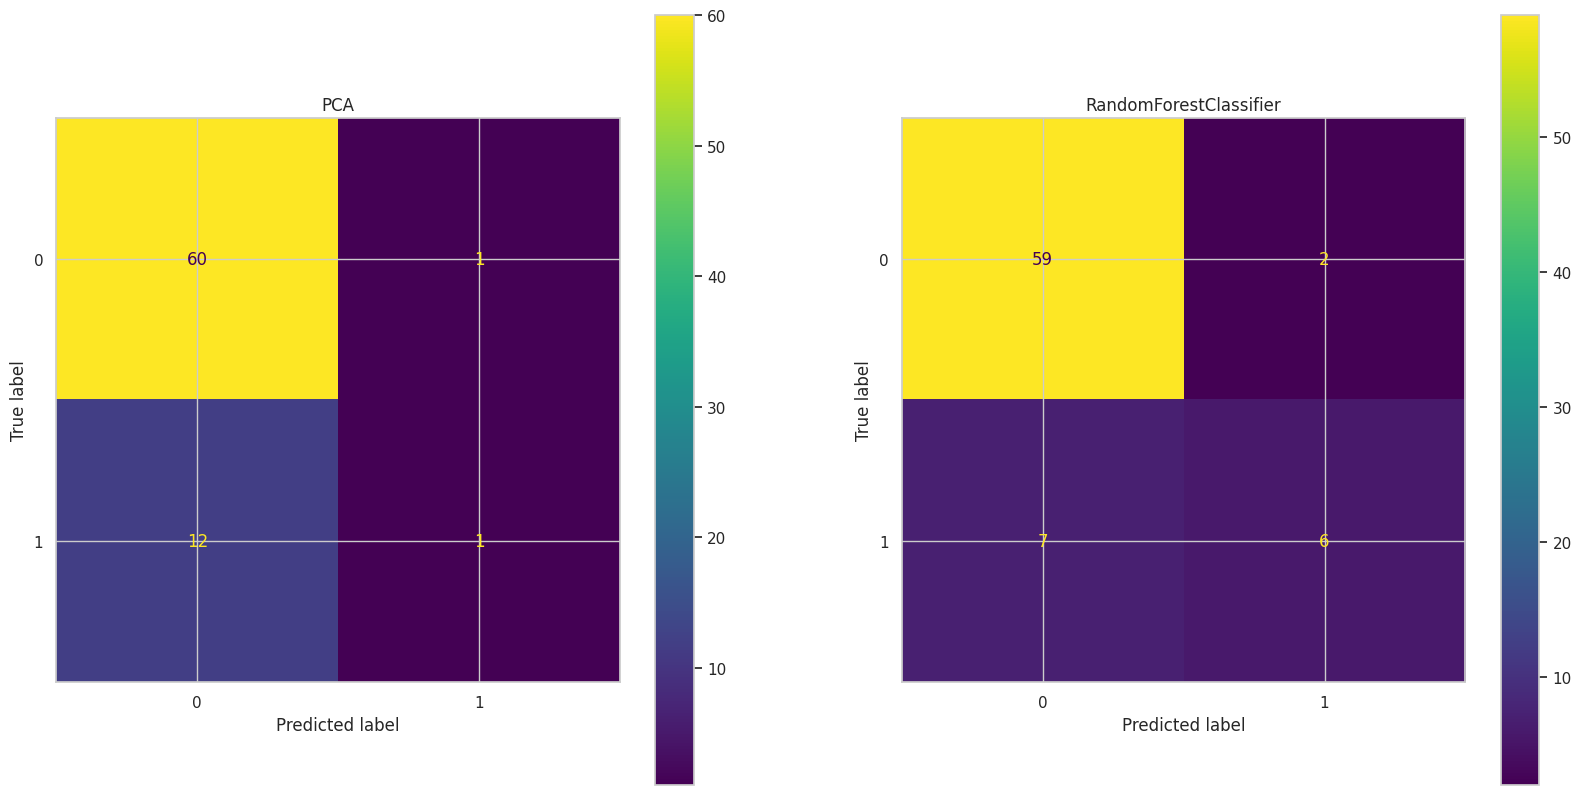

In [54]:
# diff between PCA and non PCA in best model

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
all_metrics['PCA']['confusion_matrix']
ConfusionMatrixDisplay(all_metrics['PCA']['confusion_matrix']).plot(ax=ax[0])
ax[0].set_title('PCA')

ConfusionMatrixDisplay(all_metrics[best_model]['confusion_matrix']).plot(ax=ax[1])
ax[1].set_title(best_model)

plt.show()

                        accuracy precision    recall  f1_score  \
LogisticRegression      0.851351     0.625  0.384615   0.47619   
DecisionTreeClassifier   0.72973  0.347826  0.615385  0.444444   
RandomForestClassifier  0.878378      0.75  0.461538  0.571429   
KNeighborsClassifier    0.851351      0.75  0.230769  0.352941   
SVC                     0.864865       1.0  0.230769     0.375   
Perceptron              0.824324       0.5  0.384615  0.434783   
SGDClassifier           0.743243      0.35  0.538462  0.424242   
PCA                     0.824324       0.5  0.076923  0.133333   

                          confusion_matrix  
LogisticRegression       [[58, 3], [8, 5]]  
DecisionTreeClassifier  [[46, 15], [5, 8]]  
RandomForestClassifier   [[59, 2], [7, 6]]  
KNeighborsClassifier    [[60, 1], [10, 3]]  
SVC                     [[61, 0], [10, 3]]  
Perceptron               [[56, 5], [8, 5]]  
SGDClassifier           [[48, 13], [6, 7]]  
PCA                     [[60, 1], [12, 1]]  


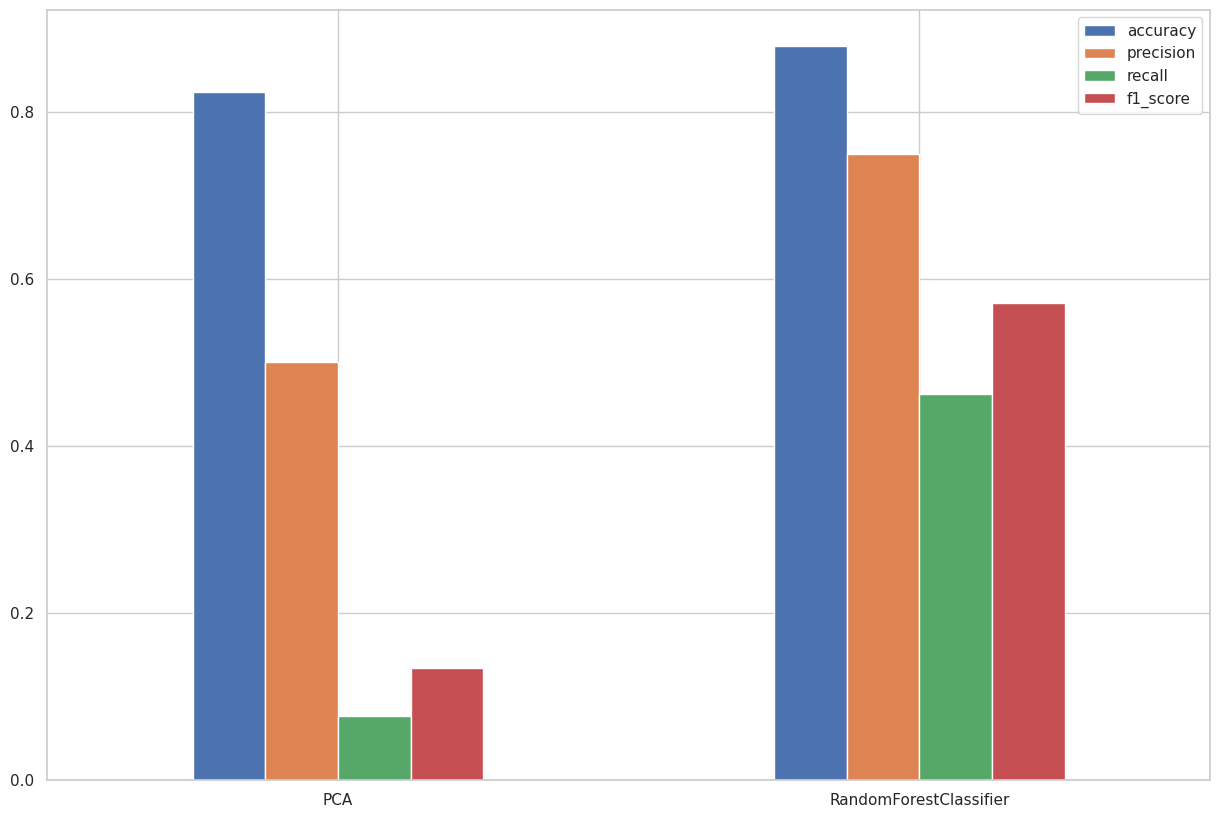

In [55]:
# diff between PCA and non PCA in best model metrics
# plot metrics bar chart

metrics = pd.DataFrame(all_metrics).T
metrics = metrics.drop(columns=['model'])
print(metrics)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
metrics.loc[['PCA', best_model]].drop(['confusion_matrix'], axis=1).plot(kind='bar', ax=ax)
ax.set_xticklabels(metrics.loc[['PCA', best_model]].index, rotation=0)
plt.show()